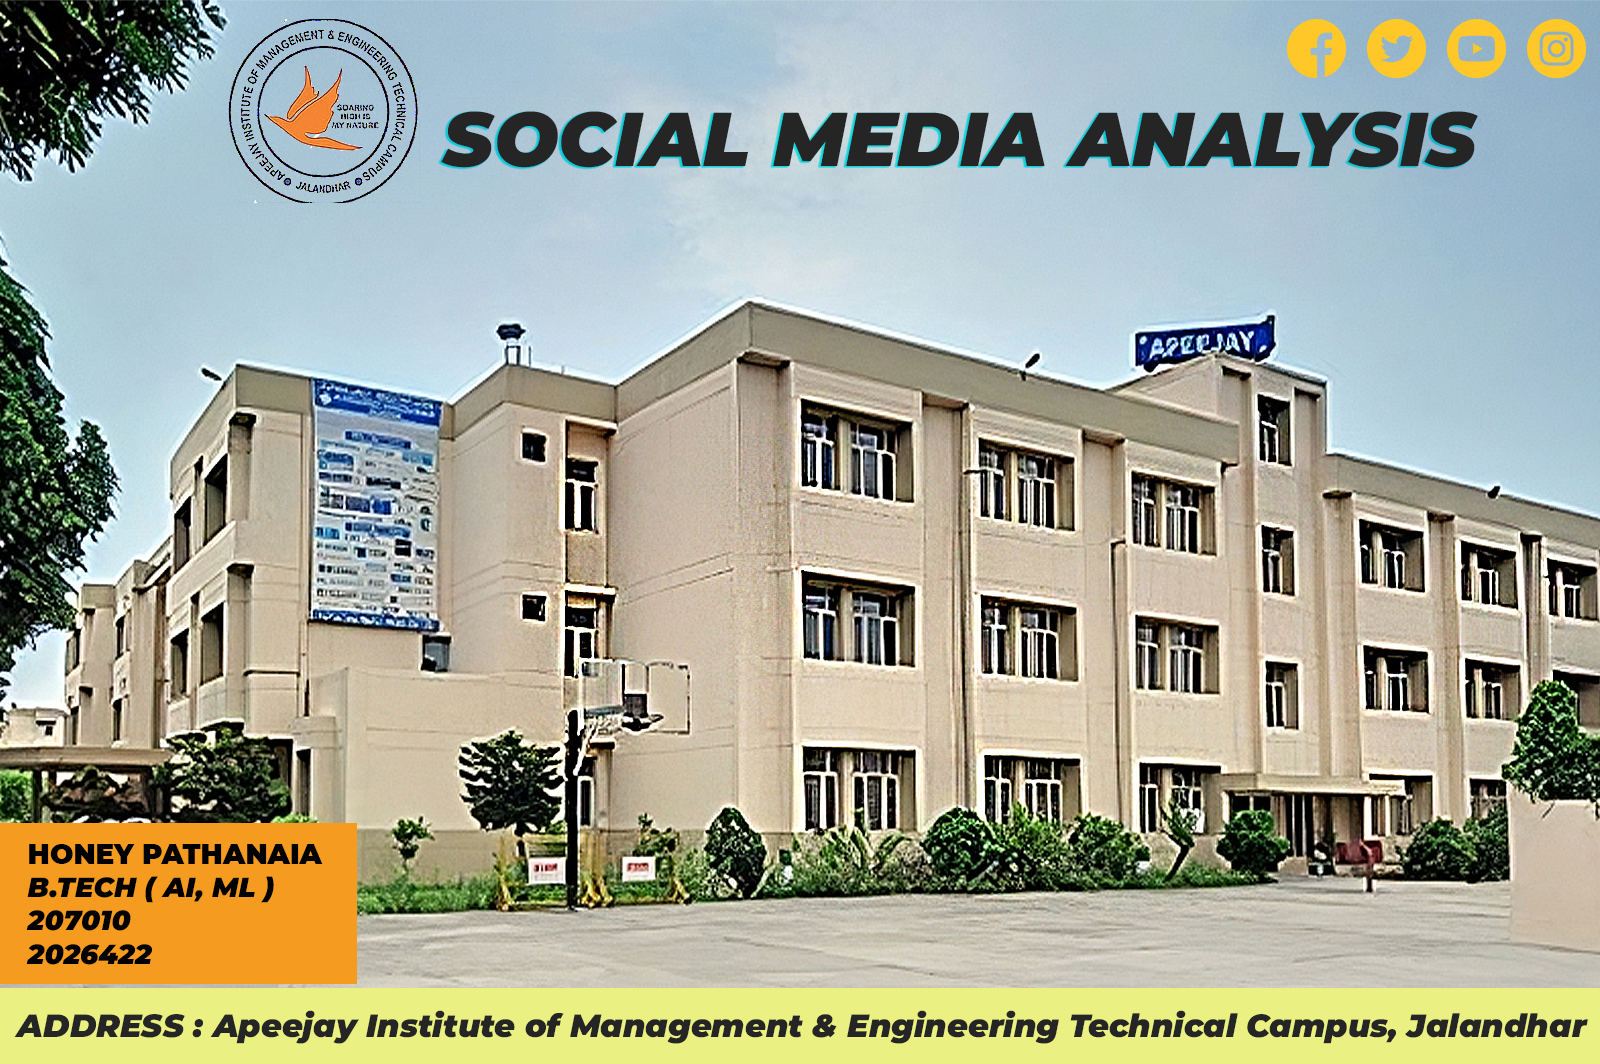

In **Social Media Mental Well-Being** involves examining the impact of social media usage on individuals' psychological health. Research in this area has highlighted both positive and negative effects of social media on mental well-being.

**On the positive side**, social media can provide a sense of belonging, facilitate social support networks, and offer platforms for self-expression and creativity. For instance, online communities dedicated to mental health can offer a supportive environment for individuals to share their experiences and seek advice.

**On the negative side,** effects of social media on mental well-being. Excessive use of social media has been linked to feelings of loneliness, anxiety, and depression. Moreover, the constant comparison with others' curated online personas can lead to low self-esteem and body image issues.

Social media analysis in the realm of mental well-being involves studying patterns of usage, content consumption, and interaction dynamics to better understand these effects. By identifying risk factors and protective factors associated with social media use, researchers and mental health professionals can develop strategies to promote positive online experiences and mitigate potential harms. Additionally, social media platforms can leverage these insights to implement features that prioritize users' mental well-being.

In [ ]:
# IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import plotly.express as px
from IPython.display import HTML
from IPython.display import display, HTML
from pandas.io.formats.style import Styler


In [ ]:
# READ DATA FROM THE CSV FILE
df = pd.read_csv("/content/SOCIAL MEDIA ANALYSIS PROJECT.csv")
df.head(10)

def hover(hover_color="red"):
    return dict(selector="tr:hover",
                props=[("background-color", "%s" % hover_color)])
styles = [
    hover(),
    dict(selector="th", props=[("font-size", "100%"),
                               ("text-align", "center")]),
    dict(selector="caption", props=[("caption-side", "bottom")])
]
html = (df.head(10).style.set_table_styles(styles)
          .set_caption("Hover to highlight."))
html

In [ ]:
style = df.head(10).style.set_table_styles([
                        {
                            "selector": "thead",
                            "props": [("background-color", "red"), ("color", "black"),
                                      ("border", "3px solid white"),
                                      ("font-style", "italic")]
                        },
                        {
                            "selector": "th.row_heading",
                            "props": [("background-color", "red"), ("color", "black"),
                                      ("border", "3px solid white"),
                                      ("font-style", "italic")]
                        },
                        {
                            "selector": "tr:hover",
                            "props": [("background-color", "white")]
                        }
                    ]).set_properties(**{
                        'background-color': 'black',
                        'color': 'lawngreen',
                        'border': '1.3px solid white',

                    })

style


In [ ]:
# SHOW THE COLUMNS NAME OF THE DATSET
for c in df.columns:
    print(c)

DOB
AGE
INSTAGRAM [SPENT TIME(IN HOURS)]
WHATS APP [SPENT TIME(IN HOURS)]
LinkedIn [SPENT TIME(IN HOURS)]
FACEBOOK [SPENT TIME(IN HOURS)]
SNAPCHAT [SPENT TIME(IN HOURS)]
TWITTER [SPENT TIME(IN HOURS)]
SLEEP DURATION
SCREEN TIME
SEX
SMDY
RBUP
WUSMP
SMNDT
SUSMH
SMISC
RIFF


*italicised text*

In [ ]:
def change_color_value(val):
  if val == 'NOT DISTRACTED':
    color = 'lawngreen'
  elif val == 'ALWAYS DISTRACTED':
    color = 'red'
  elif val == 'SOMETIMES DISTRACTED':
    color = 'blue'
  elif val == 'Male':
    color = "orange"
  elif val == 'Female':
    color = "Magenta"
  else:
    color = 'white'
  return 'color: %s; border: 1.3px solid white' % color
df.head(10).style.applymap(change_color_value)



In [ ]:
# CHECK FOR MISSING VALUES IN EACH COLUMN
x_col = df.isnull().sum()
x_col


DOB                                 0
AGE                                 0
INSTAGRAM [SPENT TIME(IN HOURS)]    0
WHATS APP [SPENT TIME(IN HOURS)]    0
LinkedIn [SPENT TIME(IN HOURS)]     0
FACEBOOK [SPENT TIME(IN HOURS)]     0
SNAPCHAT [SPENT TIME(IN HOURS)]     0
TWITTER [SPENT TIME(IN HOURS)]      0
SLEEP DURATION                      0
SCREEN TIME                         0
SEX                                 0
SMDY                                0
RBUP                                0
WUSMP                               0
SMNDT                               0
SUSMH                               0
SMISC                               0
RIFF                                0
dtype: int64

<ipython-input-25-03d695d24035>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.loc[:, 'RBUP_HTML'] = x['RBUP'].apply(lambda x: generate_logo_html(x)[0])



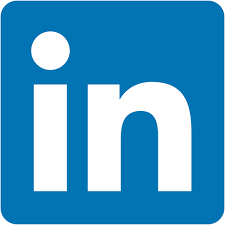
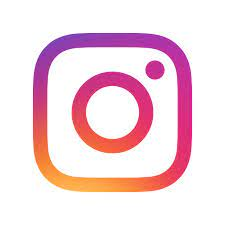
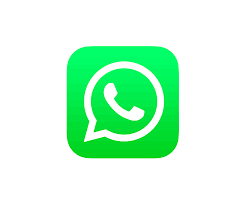
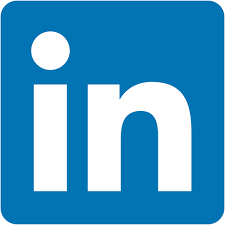
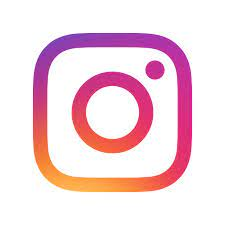
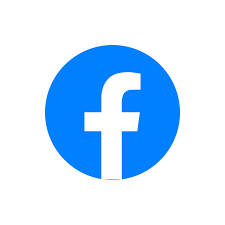
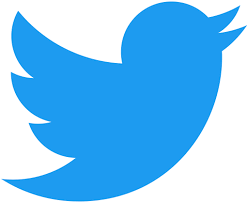
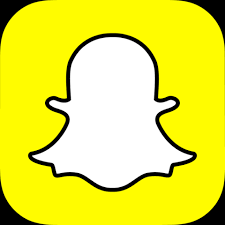
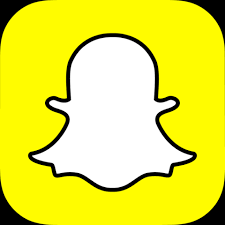
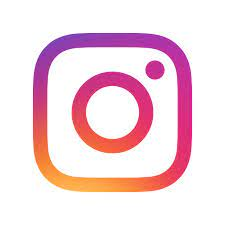

In [ ]:
# SHOWW THE COLUMNS WHOASE NAMED AS AGE, SCREEN TIME & RBUP

# RBUP ----> REGULARLY BASED USED PLATFORM

df_selected = df[['AGE', 'SCREEN TIME', 'RBUP']]
x=df_selected.head(10)

def generate_logo_html(val):
    global logos
    logos = {
        'LinkedIn': ('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAaVBMVEUCdLP///8AbK/D2em20eUAcbI/ir7l8PdIkMIAbbAAb7GUvdl4q8/W5vEAcLEAaa72+/0ngroAd7XL3+3g7fXu9vqhxd6Lt9bz+fyry+ISerZUmMaDs9Rlocu81efX5/Fups0xh71Zm8cx+dtZAAAGC0lEQVR4nO3dW3uqOhAG4CQYFVSCyEGOHv7/j1xY92pxqcxgdWfCM99VL0rlLZAzUch+omTnuZ5dEt2YxM+PaVGVgXI/QVkV+wfCqBYqFNNIqOI6+ldYaN/2eb01vpjdCo/K9im9PerYF56nB+yI5x9hM0VgR2z+CrNpAjtidhUupgrsiOmXsAlsn8jHEjQXYTKtauI2/qITriYtXHXCubZ9Gh+MnkuR2j6JDycVmynfpN1tuhHedOuKS5Qn2okLWzGbuHDGQtfDQvfDQvfDQvfDQvfDQvczWqgDXynlh86MC4wThkrPj6usyPLm1P38wfN6X8YIA1PN0u85q0UxNy6MQuKFob/+4V1zaAz964gWquVB3me3JX8ZsUKzfuC7TKs25uPn+LsghSZ7DOxSE69scMIBoJQ57auIEqp6ACjlkfSAK0YYVINAKbeUS1SMUC8A4YZygYoQqhwAdvcpYSJC6EegcOG0MHhSE96kobvUCBaqDULo0a0xQKHeIoBS0r1NQWHQoIRLshUGKFRDzZmf5GQvIig0HkpYkG2dwsIdSkh3IhkWPuoW3mdHtm0KCzGVRSd0+BrinkO6Q5JwWVqghJm7dymq0UZ58R/cppmjhKW7NT7cO7wkcbhdimvU0G3SYK7hCQZGdG9STA8YUV/QbbOhhHD/KYrpXkLUSJRaAULKwzS48VJ/uPXd0i1IBVKow6Eag/RYInZUX2+fEzeC8EMo0DMzYfmsi+EFtIHo2TX9ZHKmJv0MXoKfA1bL+/Km3ZLtUnxnxDy+NlXb50XF3IFJ7nFrMbQJm8xL0jQ9eKul78ZijLHraUKlAh3rQPlO8ASviZpCWOh+WOh+WOh+WGgv+k2NJnJCHfqma9CX5Wlbll1L2Px2xTUtYajC7XnVHtJ9FHWdl2ifJrtZ3pzEL5rBuJEoII8HaoCD7k5ZK/9cPB4tSXf5ybzYlcEItysg9aPPho6qbg8K1LIYXHyVZsuXtkDCjAiDs0/pA6FeAget+lc+DBrEXPPhqMeP671FuPilUJsKt1pALo6jhxUoCP2yBX63l818ZMFIQGiO8OLHfvJxROtCjVx01Us7qjFgW6hj3GqWmyTliELVsjAsMXPo9x84YmW5XaF+DdhdRfxkiVXhy8CuSEUPtlsVopYfP0mBnTCxKRxfivaDXaNkUWhwq4+fZR9TF+b639cZRwZ5n9oT1tD6BzC4PcrsCX95BSX2FQh7wjfkhLmITgtRS7GcFkbl1IVyjagT3RbuEGWN20LM26uOC2u4o+i4EFElOi6M4PrCcSGi0qcljKJxw27dgwjWF1SE+zavSmGMCcp53e7hA/4LYrsEEsJNE6vg7ySaDpRYY4c3DuBoBgVhUt1t5RMEyL4V3A8mIMzMo0rNLHGPJNhJtC9cP/n4APfCFbgTgHXh80XGCjWOA76PZFs4G2iUmBl8PNxHtCwc3C1dl4hHEWy3WRYOv22DGVA90L6GwOnpEv4T4LYqdoVQHx2xGcAeAFoWQv//YHiDqkvAsRqrwqGCFPnRcDffqhB+qy+Ex42hRo1VITzKgngQK8LCBNFBh+uLCmi22RQi3swM4f0OzoSFiG/wCc/gX4Ga3jaFiA3CEIXpkbAQsbcUYh8uykLMopgYbHwTvktRE/ExWCFCLT+LQtT3TMGT/ZSFmBlceGcVwkLUF9qxkLQQtTSNhSxkIQtZyEIWspCFLGQhC1nIQhaykIUsZCELWchCFrKQhSxkIQtZyEIWspCFLGQhC1nIQhaykIUsZCELWfi/CeFNO1j4LqGI51BeOgq1J6AAP/sNbzp3/0gobzzq7X+F1rc/fCIsdD8sdD8sdD8sdD8sdD8sdD8sdD+dsJ24sBXexIWeQI2XuBv/ILBfZ+Jo4r3A7PXjbvRSCplN+UFUWSdEbYXjbNJOKNfTLWv8Wl6Eke3z+Fi0iL6EiJ3NHY26bEV8EQ7syOx0zNf+p+I6vzFFornuungVyvrFLxSmG61y2RfKNp7Ww6hKT94KpczLl740mWJCVebfrh+h3M/OZaDcT1ieZ739FnvCLlGy81zPLrndTvIPtLiQPTbMMvEAAAAASUVORK5CYII=', 'blue'),
        'Instagram': ('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxESEhEQEhMVEBAQEhYTEBYYExUVFhUVGBUWFhUVFxUYHSogGRolGxUVITEhJSkuMC4uFx8zODMsNygtLisBCgoKDg0OGxAQGy0lICUtKy0tLi0vLS0tLS4tLS0tLS0wLS0tLS0tLS0tLS0tLS0tLS0tLS0vLS0tLS0tLS0tLf/AABEIAOEA4QMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAABQcDBAYCAQj/xABJEAACAQIBCAMKCQsEAwAAAAAAAQIDBBEFBhIhMUFRgWFxkQcTIjJScqGxstEVI0JDU3OTwfAkNFRiY3SCkqKz0jODlOEUwsP/xAAaAQEAAgMBAAAAAAAAAAAAAAAABQYBAgQD/8QAMhEAAgECAgYJBAMBAQAAAAAAAAECAxEEMQUSIWGRwSJBUXGBobHR8BNSkuEyM0IjFP/aAAwDAQACEQMRAD8AvEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAj8r5UpW1KVarLRjHUlvlLdGK3t/jUZSbdkErm5VqKKcpNRili23gkt7bOSyv3QbWk3GknczXk+DD+d7eSZwGcmc9e8k9J6FFPwKafgrg5eVLpezdgQZJUsDFbanBfPm864Yb7jsbzujXc/wDTVOit2EXOXbJ4egi6ud+UJbbifJQj7MUQZ9isdms61SpxyiuB1Rw8ewk55x3r23VblUkvUzx8O3f6Vcf8ir/kasLOpLZTnLqhJ+pGVZMr/Q1fsp+4dBdS8j0VKKzsZnl27/Sbj7er/kfPh27/AEm4+3q/5Hj4KuPoK32U/cPgq4+grfZT9xreG7yN1ThuPfw5efpNx9vV/wAj6su3n6Tcfb1f8jH8FXH0Fb7OfuHwVcfQVvsp+4xrQ3G6p09xk+HLv9KuP+RV/wAj3DOG9Wy4r86s362YPguv9DV+yn7jHOwqrbTqR64SXrQvDd5G6pQfUvIk6edt/HZcz56MvaiyRte6Dew8bvdVb9KGD7YNeo5SUWtqw69QEqVN5xXAy8LTa2xXAtHJfdFt5tRrQlQb+Un3yHNpJrs5nYWtxCpFTpyjOEtcZRaafU0fn0lMh5cr2k9OnLU34cXrhPrXHpWs5amDi/4bPQ5KujotXp7H5F6gh838u0rul3yGprBVIPxoS4dKe57+1KYI9pp2ZESi4u0ltAAMGAAAAAAAAAAAADHVqKKcpNKMU229SSWttspLO3OCV5XcsWqUMY0Y7MI+U15UtvRqW47/ALpuVHStVSi8J3MtH/bWufrjH+IqUkcFTSWu8+o78JRutd+AOozXzLrXSVWb71bvZJrGU/Mjw/WfLEZhZuq6rOdRY29LBzXlyfiw6t75LeXDCKSSSwS1JcEbYjFOPRjn6G+Ir/T6Mc/QgMmZnWNFLCiqkl8qrhUb6cH4K5JE9SoxisIxUVwSS9RkBHSlKW2TuR8pOW1sAA1NQAAAAAAAADxUpp6mk10rEhsoZrWdZPSoQi38qCVOXbHDHmbGW8t0LWClVlhpaoRSxlJ9C+96jnKXdHtnLCVOrCPleDLDpcU/ViekIzzidNGhXktekn3rZ7EBnHmJVop1aDdalHXKLS75FcdWqa6kn0HHF/Wd3CrCNSnJThNYxktjK47ombsaUld0lhTnLCrFbIzfyktyl6+s66GIberIksFjXOX06ufU+T3nMZCytUta0atPdqnHdOG+L+57mkXZYXkK1OFWm8YVIqUX0Pc1ua2NFBljdy7KeMalrJ/6fxtPzW8JrqT0X/GzOKhrR1lmjbSWHvD6izWfd+vcsEAEeQQAAAAAAAAAAABUndRutO7jT3UqUV/FJuT9Gj2HHk5nvU0r65f66X8sIx+4hIxx1cdRLU9kEtxYMPTSpxW5F05i5OVCzorDCVRd+n1zwax6o6K5HQmKhSUYxitkYqK6ksDKRUpazuQMpa0nJ9YABg1ABxucOfVGg3TopV6q1N4/FxfTJeM+hdqMqLeR60qNSrLVgrnZGOdWK2tLraRS+Us67yu3jVlCPk033uPV4OtrrbIWcm3i223tb1vtZ7Kj2slIaHk10527lf2P0FCtGWySfU0zIfnlatjaJfJ+cl5QfgVpNeTJ6cerRljhywH0OxmZaGlbozv3q3Nl3g4XIHdApzap3KVGT2Tjj3t+cnrj1610o7anNSSaaaaxTWtNPY0zxcWsyLrYepRdpq3oU5n5dyqXtZSbwptU4LhFLd1tt8znyxM/c1ak5u6t4ubml36C8bFLVOK+VqSTS16t+Lw4mlki4nLQjQqylw73L04rVzO2nOOqrFmwlWnOjHVa2JJ7jtO5TdSff6OtwSjUjwUvFl2pR7Dtct2Kr0KtB/OQaXRLbF8pJPkRGZObztKUnPDv1Vpzw1qKXixx37W2+noOnOWpJObaK9jKsZYhzp7tu9W2n55ceOp7+gn8xbrvd7Re6bdOXVJNL+rRI/L1LQubmC2Rr1EurTlgeMj1NG4oS8mtTl2Tizvb1oveuRZakVUpPen6F9AAjCngAAAAAAAAAAAFFZ0SxvLt/t6i7JtfcaVhTxqU4+VUgu2SRt5wfnV1+81/7szHkhfH0PrqftxO7X6K7i1Qjamu7kX2ADhKqADj+6HlvvFHvMHhVrpptbY09kn1vYufAJXPWhRlWqKnHNkDntne6jlbW8sKS1VJp66j2OMX5HtdW3hz3gSWQMh1bqroQ1RWucn4sY8XxfBb+1r3TUUWynRp4anZbEs3zfzciMim2ktbepJa2+pExa5qX1TxbeeD8vRp+io0y08hZvULWK73HGeHhVJYOcue5dC1Eyauq+oi6umbO1OPi/Ze5SlxmjfwTcreTS8hxm+yDb9BD1KTi3GScZLammmutPWj9BkZlbI9C5jo1YKXky2Tj0xltXqMqq+sxS0y72qRVt3V4O/qUYdTmfnVO1kqVRudtJ7NrpN710cY81r26mdGbVSzmnjp0ZvwJYdfgy4Sw7d29KDN7qSJhwpYml2xfzwaP0BSqqSUotSjJJxaeKaetNPgZCvu5plxy0rOb8XGdF9GrShyxxXPgWCc8lZ2KlicPKhUdOXHtQABg8Ckc7oYXtyv2sn2tP7yKoT0ZRl5M0+x4kznqvy6589eyiDm9X44EhB3SLrh1rU4b1H0R+hgAR5SgAAAAAAAAAAACi84F+VXX7zW/uyMeSF8fQ+up+3Ez5fj+VXX7xW/uSPOR4/H0PrqftxN3U2FwS/5+HIvMAGhTwUxnheuveVX8mEnSh5sPB1dDek+ZclWeCb4JvsKGli229bbxfWzDlYm9C005Tn2WXG/sY4wb1JYt6kuL4Fz5r5Hja0IUsPDfhVXxm1r5LYuhFZ5o2yneW6exT0v5E5r0xRcoUrm+mqz6NJd79FzAAMkCAAAaOVsnwuKM6M/FmsMd8X8mS6U8GUhe2sqVSdKeqVOTjLrTwxXRvL9Kl7pNsoXjkvnaUJvr1w/+aNouxOaErNTlSeTV/FW9Vn3EDki+dCtSrL5uak+mO9c1iuZesJJpNa09aPz+Xhm7UcrW1k9roU8evQSxMzPXTlNWhPvXNc+JJgA0K8Utnt+fXPnL2YkFJavxwJ3Pb8+ufOXqiQc9n44HZB5eBeML/XT7o8j9CJn08o9HGUcAAAAAAAAAAAApPL0fyq5/eK39yR5yRH4+h9dT9tGfLsfym5/eKv9yR5yVH46j9bT9tHG6hc1/Dw5F0gA7CmGOtHGMlxTXoKL0dbL4KfzlsnRua8dzk5R82XhLsxw5HPXdrMnNCTWtOHbZ8NnNDNCqoXtvJ7HJx5zUoL0yRcBRtNuLUovCUWpRfBp4plxZHyhG4pQrR+UvCXkyXjR7RQmndGdN0neFRZZc16skAAdBBAAAAqnul11K8UV83RhF9eMp+qcSzby7hSpzqzejCnFyk+hFJ5UvJVqtStLVKpNyw4LcuSwXI1bsTeg6LlVlU6kreL/AEaRd+bcMLS1T294p+mKZTNjaSq1adGPjVJxiujF4Y8tvIvWlBRSitSikl1LUja9zo07NasId75e/AyAAFcKWz2/Prnzl7MSDns/HAnM9vz6585ezEg57PxwOmDyL3hP6qfdHkfoNHo+I+nMUQAAAAAAAAAAAAp3Lkfym5+vqf3JHjJi+Oo/Ww9tG1l+nhc3H1032yb+817PVOm+E4vskiGnUtLx5l0jtpruLjABMlLBx+fuSHOCuILGdJYT6YY4p8m3yb4HYHicE001imsGnsfQaTgpx1We+HruhUVRdXoUm4kxm5ludrN6tKlPx4/+0eEl6fSt3OjN6VCTqQTdGT1b9Bv5Mujg+XXz7iRDlOlK2TRblKliaXbF/PBot7J1/SrwU6UlKO/inwktqZuFM21xOnLTpylCXGLafVq3dBN22ed3BYS0KnTKGv8ApaO2GNjbpLgQtXQs070pJrfn5Kz8iyzWvLqFKLqVJKEY7W3gv+30FfV89ruSwSp0+mMHj/U2vQc/f31Ws9KrOVR7sXqXUti5G7xcbbDFLQlRv/pJJbtr9iVzuzmdy+908Y0IvHB6nUe6UlujwXN9HMNGdxJfNrN6pdVN8aEX8ZPj+rHjJ+ja9yekZuTLBGNLC0bZRXzxbJnub5Gbk7ua1RxhS6W8E5dSWrm+BYpgtLaFOEacEowgkopbkjOdiVkU/GYp4mq6jyyW5fNr7wADJylLZ6fntz569lEFP7vuJvO+WN7cv9o12YL7iJpQxlGPGSXa8D1i8i+4XZTp7lH0R+gQAeRQgAAAAAAAAAAACrs5aeF3W8/HtSf3kdFb+B0eelvo3GluqQjLmvBfqRAqJXMQ9WpJb2W/CzvRg9y9EW3CWKT4rE9EZkC475QpS3qKhLrj4L9WPMkywxkpxUl17eJUpwcJOL6m1wAANjUx1KaknGSUotYNNYprg0cjlnM5PGdu0uMJPV/DLd1PtR2QPKrRhUVpI96GJqUJa0H39j+cSob3J9Wk8KkJQ61qfVLY+RquJc0knqexmnPJNu9boU2/q4+44pYBp9GXH5yJinptW6cOD5P3KicT3bWdSq9GnCU3wSb7cNhbEMj2y2UKX2cH60blOCisEkktyWCNo4KXXI2npyK/hDi/nqjhMj5jSbU7l6K+ji8W/Oa1Llj1o7i2t4U4qnCKhCKwiksEjODshTjDIh8TjKuId5vZ2dS+druAAehzAA1Mo3apUqlV7KcJT68Filz2Ayk27LMpjOKeN1cvc61TD+eRgyTDSrUY+VWpx7ZxRhqNuUm9bet9b2kxmXbd8vaCWyEtN9UE5etLtCewvlS1Ok9yfki5wAChAAAAAAAAAAAAHOZ42WnTjVW2k9fmywT9KXazjFAtGrTUouMlipJprintOAylk+VGo4PWtsX5S3Mg9J0WpKosnsff+0TmjMReH0nmsu79M381MoqlJ0pvCNR4p7lPZ6VguSO1Kz0CfyRl5xShVxlFalJeMlwfFfjWZwOOjBfTqZdT5GuOwbm/qU8+tex1oNa2vKdRYwmpdGOvmtqNkmotSV1tRDNNOzAAMmAAAAAAAAAAAat3e06SxqTjTX60kuziHszMpNuyNor/ALouXFh/4lN461Ku1uwxcYdeODfI95wZ7rB07bHXqdVrDDzFtx6X2HBTxbbett4tvW297bPCVVPYiwaM0ZOM1WrK1sl137X3dmd+y23Czve5dk3XWuWtX+lDnoym/RBdpxuT7CpXqQowWMpPBcEt8n0Jay58k2ELejTow8WnHDHfJ/Kk+lvF8z1htOnTOJVOj9JZy8l+3s4m8ADYqoAAAAAAAAAAAANLKNhCtHCWprXGW9P3dBug1nBTTjLJm0ZOLUo5nB3djOlLRmup7n0pmDQO+rUoyWjJKSe5kPcZvrbTlh0S1rt2kFX0ZOLvT2rs6/Z+u4l6OkIyVqmx+X6Ob0DNG7rLZUmuqcvebtXJFaPyMerB/wDZrys5rbCS/hZwunVpvJrijrVWE8mmeVlGuvnZ9uPrPvwpcfSS9HuMbpvhgeXEx9ea/wBv8n7mdSD/AMrgjI8rXP0suyPuPEsr3P0suxe4xuJjlFGf/TP73+TNlSp/YuCMkss3P0suxe48PLd19LLsXuMUkYZRRssTP73xZ6qjT+xfivYzyy7dfTS7F7jBUy3dP56fJ4eowzSMbpN7E3yPWOIk9ms+L9z1jRpr/C/Fex8q5VuH89Vf+5P3kbUxbxet8d5JKwrPZTnLqhJ+pGehm3dz2UpLplhD2tZ0w15dTZ7KpTpq90vFI56UTJZWFSvNQpRcpPctiXFvculna2GYmx15rDyaf3ya+7mdbk7J9KjHQpQUFvw2t8ZN62+skKVGX+thw4jTFKmrUuk/L3fhxI3NnN6naQ3TrTS75PD+mPCPr7Ep8A7ErFaq1Z1Zuc3dsAAyeYAAAAAAAAAAAAAAAAAAAAAABnWYB8PoF2D4fQBdgAAXYAAMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA//2Q==', 'red'),
        'whatsapp': ('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPYAAADNCAMAAAC8cX2UAAAA+VBMVEX///8A/2gA1iQA/WUA3jQA9VkA1B8A+F4A8VMA7U0A4jsA5UAA2y4A91sA3TMA6kgA0QC78L8o/3QA0ADM+dMA/2P4//vM9tEA1gAA/V0A/FYA91MA80UA6D8A5zUA3iLx/vXM/9xI/4Xl/+24/cqk/bxR+4cA+E3q/vAA7D3Z++AQ6UsA5CoA5DWV8Kbd+uR16Iuk7q7G/9aT/7N5/6Nt/5mD/6qf/7oX/3Gw/8db/o6L/qy//tA6/Xtv+5ZN+X8q82ZV832A9Zll84dC726I8Z2e869x7Ycn5lSv9Lw852Bl6X014lZU5W2N7JtH4mFY4m2C5owp2TsdHxkVAAAJLUlEQVR4nO2d6ULiOhSAHVxARAFl6QK0LsgybI44uM64DAKiIr7/w9xCky5JujBKG+ee79fYnHPM1yRtWsVZWQEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFgq1R/l0+7Z8cHN7t9zc3Nw2f3ZO6qHLeOT/e65KGaz2dVvH2VVq5IVxYNeNWwnT3rfxOyHfUl76Xg/bC9XLrLiJzvrZKWDw7DdHFEPliOti/fC1nOgnv3s6W1DvAxbkMkPaZnSGtndsBUZ7C/bmkvvQ+njNyxPxOOwNUnOl7quMdJp2J52fi7vGm735uo+pk3xYMgehK1q5TIbkPaq9CNsV5PABpuv4b4SF+++iFh0nnC0ur8t1HFRlMTdy+5pr1zunXYvb7QvF5AXubmYt/3P8awonXePiAE7vL7alfyaZ2/CkaQp+53jorTbc5ij6sWB5K+MlAvWzpEzX/3VBrrbditTPRUlH0Mu8fLsfRP1YS2Kp97DVF71PoPiRQBKfoh6I1Z++pubPUn0KsXLNU30Gu2odOP7tqM+SO7lxO4yXfyTq3iMz3alTKSo+xdXvy6Pjy9/XZV/kC8Ir2XXARfPghJzp+qhLZ7bh/q6u1qRZLxdkaVK9OxItQbkbiS3cpw8fdbdtWXby6D9M1kWt8npIFeOr61RXZeS25zcuOtuYxOtWJfi0W6FVMYyUtS6EsrO3tucvGPZl92sLdfd/XPZQXquI0ctt6YjR+/t8+AVWbhpV8zXvOqx00gbQhXLBd/RezsahiSNi7Z8ZURdy26TwhA3Z/qFgzcv2pnKtgPyLyPo3jHITsW8AJ46pPCuLd8aMb9lf9azJBUnPbCTeNF2UpJVHHLr21rLihpp0XWetR1Gu2Dcihex3t5eX1dRXrvAauZGe52FubBvZGaAM1H82HLKzAzJk8BJG/f9YVHrddnYiN1+Ne0K3nuUC4taa973KHmflRyWqJ0Mq2uxW9R6aLbGCoVKoeBr7Av4dfgdIzwkTwKmttHv25hhHZ2/Dvrlxzsmo/Q2VTzGjXaM5hY1ls1GfKGSGeEUxjS/o8I51i4c6W05s9Myfp1w78u7gLbndao6x9p4jvYNRXwiZqvdj7Z8h8JvqabgFVkwtPEUzZlNt2bCbz/asQJ6u1ymygduyIShXUC/O9gzmgojM+Ha33Cj7Y76dbRxzywnQrVk+LHWUtAl8M8mn9o1ssObaI7v19h9bSX9aNfQBHkko4MWZENr19BDyL3R4c0/1gyVymCxiS5qdXv0JjfamwQ1VW+JmYfubCkPSTKFRQ1FE/W51UYdO7Q02EZbmwa+tDN69N3X0E4+6A0ja4M1I0edKCbFlh7eL9qPBy3IhtLG3b23dLdm/ZGPvzm+mUQrw3b6+NWuoQ3ZncWuZrlv98kEJ2LsbxC8IgtaG63J7xbtpLm4ycFzpqQnWK8RWiVutdG2smadyyXjNxmK/qb4LEdfGbnSl9A2emv1Kz7gePIK5aKNnsJs5y/5PRRLikwtaaekzo+rJftR4zM+m0mf4JSi7Sgv2iWyt+r8eJU4PsQJ+ca/qa1PcmK0k7U+znglM/4l7Rx5vGFM87ti0g94bdsLcauNLtq0m/HbSkNf3g11HqzaFwW32ui+PdwiGormA4ndu1hinoaGHtv+IqONdmT0VC4Zy3vljyWrOai3GObFIesbFLnR3rLTfNUb+sUtkoa5R+038EFd7+Q7Wac41iNHTdthXrXxXD4iG2beGTNvC7U3Vf3A6HvJdqKaj/rx+6+hvbWlN1QbVIPmbflkcr/UtB85GpYYoU/2WcOtdgM9ZQ4Z2jZvtd8sWea9xpFFsYmOEWePE+08NailtN7Sb5Itc++8NXtEfOZlYOQ00dKuk/WDkPKG1m4O9Baqw8h75FLN1G6gF5Et8uQt3cgXtHY8jpqGcbZ337naU9yjSJxbbeN6fcIe7q3Gk+pUrYElm+jcHBI1+NGOk+BZvtKkmnCEw0TPKDgC7Uy1OU6k8qsdb6Ddd4vRhiKemB8cecKSzQ46skVm8qKtkB2Lx5UT1Og43PGmMqbFB0YtRdWPpKnqHGsbfRuxGg3xp7StkjoxrdFLZ3P4v4S2gtfuxHm84/E1pdkxdqu5lrJmNAydi/OsvYZvPxmX4daHvDl+HKVHj2PFEqng+f/MOGthidphascVY6fmrq2doaYywxqnoIcQ1hpZ40Z7jQG+JA1ZjR4oY1w7wWjlWhstziqz0Z3EEy49+GraCnrVMFpcWzHeLGeYyVxro8esMWu83K2fcWGVfcq41kaNi1u/GIWf2ckcaydQ5+uLznHBfDgbO+WG5EmQV3Yo8Ob00WhLKAk6jEpLmK/a+oyyOiF5ErC0BbTdmMxcEwlFWBukp4KHeEIYmJ92bglOUfxqG10TZsrK+GT+U532xE08ITxb3rK9Olnzo625ESjoeTstCC+PFpn6i6BQwXqG8JSx1BzQNQ041kY700yeDK6+7tDmipCY2h5CJw4nZ857MFpe1GltQXWLb70kBEFBaP+avNr/qmd9x8068exQN2DatLZnz6qZUWva6UxbJxnqXUPLZYLPmCxHY1GqVDfxzvRvqA89rCNvn9f1j5Cj+ilQS3oll3b9mysYdewhrWkPvMsEArUSBSIg//osCALj1RlBtSNEvKwTG9MlaSxKguhr5MXSWG9NtKvWLCIiTNKONTTyb8KGp7S2gh7digTIhNAW8GvT9smbdqWOGM0RIdLJsGvkpwkfIz2v7nruAmRKDNJ8Z1odjSNCKkJOhA1BmLQytj+1Us0/vm0IG/6kUXUeSGsDamVnJd3ZETQRB7R1Lry/jDvTaWf88j77yjGUlR22LkYltBO+PDbmLOCL0sbeHQqI58V7/9dws7RXVkaCd3c/TTtsWQvBaad4uWvPaKUC01bDdrUSCWh1pz6w218C+WCGeyMRtihBJxDvFC9bFYPn1MbSSbn9ilNIvC/dO9Xy7kXwLHu8U7w8ehEMluqd4md7RpBOLU08NeH4f9DJTZcjnopwO9Q6uVZkL7X3mcpaOfe3MpzQPnnbSO3tpT7OnlblvZNWwzbyTa5az2fSHySfb6thiwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8D/gP8rPyGwRmN3oAAAAAElFTkSuQmCC', 'green'),
        'facebook': ('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAclBMVEX///8AgP8Ad//T5v8Aff8Adv8Ae/8Aef/F3f8AfP+Zwv9Imf+81/9YoP/K4P9Snv9uq/9Blv8Uhv/v9//d7P+w0P+Rvv9zrv+Juv8wj/+ozP8Agv+Btf+dxv/A2v+31P/k8P/1+v8Abf94sv8hi/9kpf+Cp2uuAAAGU0lEQVR4nO2d63aqMBBGJQQirVVBvFVt7eW8/yseqe1qtYFMPnLBrtm/XSy2QGYShsloxDAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzAMwzDMX2ORLlfr2bZKcqVUnlTb2Xq1TBexT8sNi/FqVgmh8kLK5Aspi1wJUc1W4xvXnG62QuTfZtfIXIjtZhr7NFHGc9ll98OymI9jn6w99X4nCqPdF4XY7evYp2zFpMxyst6ZPCsnsU+bzGMlzDfnb6SoHmOfOonHnQD0zojd8B0nFe734VgN+16ty6yXX0NWDnjM2UDP3zVSbGKLtJBWyoFfg6rS2DI6NpmLC3hGZsO7jIuy3whzjSgHlrBOCemZHTIfVLp66D+E/iY7xNb6Zu1D8KS4ji32xcztI/iNmMVWO1O6ChK/UWVsuYat7SzChnwbW+8kSJ8FIhTRFUufV7Ahj3yjzvw9g1+oqMPN2tco+hMRMWh4CfS/iRf6p2EET4qRErhFr0FGFkoJkZ1olotld1qbx0nDSzjZlipT2/lqOU7r47GeTg77h3eVCdV6QBllQN2go4wS9wfNQsXx6a79P4sx7U/Bh1Alq9Zb7tAee7Lws/4KukelWHUc867dUFbBzD7ZQKFedc/cOwwTtQ+ldqaGHkJT7O4yTETYRUZoHDUOF52GYcfTCTLMKGP21WmYZCFXwytAkHANug2TgIPNI/IUFua8xGAowr222QGCYmk+rsEw2flXO4NcQkmZq5sMg11E5CkkTQ9MhqGexImvS2g2FGGGUyQWKsJTSDAMExNrJBbmL5RDGw2TLERiswcmvvIf6dBmwzxEdoqEiq6b9OVYp9Px0+R5+Tw33/8BAsYYifbi2Ha4ZfmxjnFCqfY5/o8j+a+emiNr3G3/fP1u++a/mHs3hGqB7vXHSoHKhsK34BRKSd+0x3pBFuuE75XFDXJWSr90MUeOlftek9oid6nS5pMLaJ2Alh3hYGelDxaP2Fsd4Xd1GIoViXrWHesBW1H2HC9W0Eq+PmFGpign8q71yP7MoP9da/gCvnqUft8nYv+71vCIvrnymrhhA43eEH0t4HeoSR0aQrnDx9F8xvwlOMA7NaTNpkGwodSxodfBdI0Vz7g1LHxWLmDBwrGh13ABZaXODX1mpmAaoo8WcC2Oz1VT8JQcG0qPhmB9iWND5dGQGA6L7JJX3dwifb36VUYNtvENi32dXqLLs17Sa56JiiK6oQLr0J6I963Pa0h7DtUddvSOcppghsQzAA3fiBmTz7GUFg9RQ2rG5DMe0nIa1PCdJug1p6H9y6AhdYHYa15Km1uAhtRlDa9zC9r8EDSkpuJe54e0OT5oSF0h9jrHp+WSoCH1lYjXdRraWhto+I8YLPwu65MCImhInV77fdFNChegITWj8bvmTRpMMcMFMVh4fm9BeveEGVLXwMWTa6kLSEMNZkgtJvP8/pA0HGCG5nKhD3y/AyYFLWwGTFxt9v4en5Ravd9fUupidH3/cAFxpdJ7LQatnkZekukGhzS7/BFN0H89DVQTpR3+sNXEADVRSK2CQ8MAdW1IbaJDwxDF7EB9qTvDIPWlQI2w9taCDIPUCAN13s4MA337ZF+r78wwUK2+/VtEZ4ahvnyy/mbGlWG4D59sA4Yrw2DfPVlfREeGAb9ds30SHRmG/NjZ8htSN4ZBvyG1jIlODAP3VbD7ltuJYeBvue2+x3dhGPp7fLueCg4Mw/dUsCqAdWAYoS+GTW+T/oZxWprSx9PehnH601j0GOptGKnHEL1PVF/DWH2i6L2+ehrGbPNJ7NfWzzBmvzZqz71ehnF77hH7JvYxjN03kdb7sodh/N6XpP6luOEQ+pdSetDChsPoQUvoI4waDqWPsLkXNGg4nF7QxtCPGQ6pn7epJztiOLCe7Ia++oDh4Prqjzr3RrA2HOLeCKOu/S1sDQe6v8WofY8SO0Mpgi860WnZZ8bKcND7zIxa9gqyMBz6XkENmv2etFU+OsNb2O+p4deeXTTDm9mzq+Fq3zWK4U3tu9ZwsXee0fD29s77YDwvPvc/7DS81f0Pz3zuYaldDWwMb3wPyzPNPqS5Nlq8it3t70P6g3q8PGz2bw37zWE5rhfTvyN3AalFJMMwDMMwDMMwDMMwDMMwDMMwDMMwDMMwDMMwDMP8Vf4DU3NdS1PK+q4AAAAASUVORK5CYII=', 'magenta'),
        'snapchat': ('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOEAAADhCAMAAAAJbSJIAAAAzFBMVEX//AD///8AAAD//wDx7wDk4gDY1gD59wBAPwHo6Oj5+fn19fX08gBfX1/k5OTPzQCJiYnZ2dnl4wCnp6cfHwLq6ADDw8Pf39+fngHIyMg8PDwqKiojIyO9vb03NzfT09O0tLR5eXmmpQCzsQAzMwB2dQG7ugGEgwFKSQFPT0+NjAF9fX0qKQGjo6NoaGgSEhLBwACWlQFGRkba2QBeXQGXl5dZWVl+fQFrawAZGQAUEwBiYQBVVQAJCQAdHQBHRgEvLwE4OAEkJAEYGBhDr4L2AAAOO0lEQVR4nOWdaUPqOhCGS6dQBLQoouIKRRZxAwFFhaPi//9Pt5O0LLImmZTCfT+dNc1j2mRmMpkY5to6rvcabtVxEvG4ZVkZI2xZVj6ecJru2dtn8n39bhtr/aufiuvkDRgpdDpfow7Yeees901E+F2pHm0Ua65Yh+Ll3oMq4fubk4ka3Fhez6xmZaBA+OXmI0vny4PMn91KEiabdtT5mLyvsryEcSHhsGxsAx4X2O6HKGHD3h4+FNg1IcKv9nbxocD5WZ+wsUUv6Fhgv61JOGxuI5+BU055ztc4S5iMbymgJ0jMTqozhB1rewE9xHx9FeHnls2hfwV2fznh51as8csExucywu0HxPmmv5iwv+WvKNefF3WS8GerJ5mxIH87n/B9Cw2Z+YLEYC5hdVcAPcTyPMLa7gB6iG+zhD87McsEAvt7hjCxS4Doafwl3Kl3FDV6T33CD3vTPaIWZAZThO6uDaGH6E4S3u7cEHqybycIy7s3hKNFkRHehr8JEYYytyPCs10cQm8QzwLCQX5HCY8GPmFvNwE9xJ5PGEJsLdiUs5n83+t/apUTDjW7hR5LJt50G5VOv55kqvd7NbfZtnRTQv4fI9T5kiKd0+rM38t86LQ0791BhxHqs2cArOqKPcxhr2zpY8TZ1CPU5doDOKt2L5kGPUcXI3oYhvmgx2IDqCYnMK6fusWTm9M91MFhodgtnU/8bbKqiTHzzyP81NG2xzd6Oy+fcjep2KxSh7mny9E3qYcR+h6hBoPGez+D4PrFfWEe3YiycH/h/8u6jncVGh4h/WoIVrBbuX+VXoLHlb7a9/91LUPflapHSL7VBI4friwdrsTjOizx//DjkPclbhrU3j1Ayx+/dfkYoz+OLeo3NTMwbmmbBLvHp5cTAT7UFZ90esTbz/BtdEhbBIsvEaVl08t8pfmr+kVrQ0LfqFA2CEd8jbgS5mPDyP7vN6kvBxWjRdgeHA2xj+enUoCx2Ok1OSI0DEKrFCyW7/G6eoVYpPQds3AIX1RwDbogFNhsmX+S5vOUYnNqnW5+h7JBt+Azj1oNMECkmxygapAtsjzu8yo+iU6Lv6hk3w40DaodGUgwF0L+Gwy0xwxVKpcOHIPKaOMRZhE7ZpEOmQFH0ytCQmDGdpEAMBbLYVMNon45Rp6mIfaOlkgAY7EnbIzm8/EILYp2DAMTPH7VP0KuvV+vtU+SflERssCkpK02T0VsjmQdoyK00d6+IwOMxV7QBqfoGSRICPk+FsU8GugGG6RIfyEiNJLqxswfoWlTjwwhNPEnLutQzBdbFAnsLSLCDvkQ8kEk2G+gIczgz7tATHiCjar7GCSE7CU9V7W4/yp9QbJg0BBibk6WGDAWuycx3WgIcSYVDa2tVpFkNiUhtPGLOSAnPMVmlTtHQQht9AupP0P/Q1T2fEgI0SbdJweMxV4pphoSQoxe3GsgLFFEM0gIcSrtaiDsUkymJISfZM79tHIUVg0JYV3LYsGD/Mq7KiSEGOi+0UCIdttXJAgfiH3DQOgj/kSB0BiSu05c6EA9RIHQPtZi0vwfCA+8doeqvaMifN7TRHis6iFGfgx3m/A0Sm/pbs80xvGurxZaV3zlbB8Swm9NVlshKjYNs0upY4moE4pADcQj7FsgYT8ShB1NhEUS/5CCsBdpD5iK8FEDIUYxlI+2khDWNMVpsibmm0aBsKUlqM/D+uqxNgpClzALY1KYkaGcdUdCWNawe4jap9joJiFsaox5T+4CS6WASxF6T8rY4wNZLFmIMg/DV+plIr0NKyTG8xI1ACUIwS53hh/vyVZwIIvtzJBvkMZi6evRzoyH1/oZmOZ7vyxa20KYEMAdHdaqOPygZN779QVVOtQEIe49ZdhJTKcSPNMcuGLjKEoI9nQRpk7DLbf6egj38HhCv+U2OtMH4HpCwyhMyA9TmL/mH2kIRR38fcaFfwxMyJITJOSJM8/Zm73T7vXU03XZNCNddw/S6Zv7Z/y1yKaiKCG+kP5Zg/RJKTh1Zt7pcC1isasXv/3LUnBC7BB/sCLnCUUJ8XFjdz59k8uWSvePOkIYXDeP96Vs7mbiI0fH/10zoT6edYTBmw+NhOjOv26UEDP5RTYVRQlZouydjhD+etpjX6aIsSq8WvDDr4/0Fsw6SnXZ04ViN8KEeV7J9uIx/HE86PL1UKwyoEcoVpoG8n5Nwuf9nI5I/kK8XHBYuCN2ss0jFBTYZ6NV+LUYzkju5V6DRw7OBM+YihPiIcNxPbvfe/0DeVoa24g14aOJMoQG1nkfF7vI6p110vejJ32fSVTQkCJk/miiEdQrudRpAtw8+0+5bbSlqqBIEnLIdsO/R0PHpgXXCX/AsSSeEiGDtF3+tur6GE/52+kq3GCgRIj/32Kzji5Djh22VKwloXpyDaAx7W9QCv0I5SoLBFneaALocIC5C6ycukdAqCsgzEPCykFvotMWGsKlMf4ZKh8MIiCsahtDkkTvyJ4nQZGcKVEnzKBtQ3d6dFK4za1cWZVm5+mZPh6M2hN16LUQ2l+mnt1DFO4g1hU7qErIIzc6cr5Q7Jil4lyjPIY4hDo2D7nu1AdRkZD+iPO0CA48qxFC5l3bYsiFS+JQyfRWJKzp/ApRzH9SWhOVCHkxDD2rfSC2AaVSykVtDLFgi4a90UmxfVKVHEwVQu4a6jFnxipyJ3EThHy7VOc0w8VKuci7GPKEkMd59FJ/THgPw23H0gXOpAn90mV6Nn+nxUrx9WXrKcoTVvTPo4FYUPgtZEJewjOszVK2ayhZK1eSEFy2a6F3oRiLfYqSIRs5Qv/miPB29Jl9KmegShH6gGHMMoF44U+ZUZQh5K+oluT1xWI13GRShmVyL3mh51yogLHYo8mNcFFGYULIfG4EMBjFnqgrJZxd6nxv4BXlKvKNRMFafILZpTavZP2sb8dwmQp8N1FsK18oXwicL/YI6TrBquJ1hsXq06+fawIQ9zN1S2Et9LPyK2Kbb3HyGvwA7SADYxOf4FhFUwMjplo3O37L+5tLauPaC3JrPpskF7ggndUcJZJfhGnHLNLV6FKMSjOjeucQxMu18TXQF+EvgvP1OGI067WySi2p4JoDppfcZjIS5ymdm7zDRf4OkokbWS9Lm1kCFypVKI0HUjoqDv5VONelk80tEIuVvir5Bwak6/SwagnZq4PovJ1/lTq4wpDxUHobFW1QPYkkdEJC6Ygx95PuozuEgZEjHTAGi504uozQJDqt1CML4PyTv4IzuDb4srspW3uJUodZPzVTpbY5OEGq7Eu2EKX5NF3IBkeGRB3Gv4ijy6m8kdzvFvY2/8KmDk66r6PE6EFD9Rosz2l6mzj/93z+lC3OvUUtDKVvitn9yUNzH7UjAuvbM73LfXNKF3qyLVfp5HK6G51yhsiFwpOw5enDo5vwoaaPXPaqtJd8opPSdiu3QfvhbMlMa5S1n6x4/oSO2z2Zr+i4NQzWaKiqu0rs5LPnLCWUfcLVlDjzhH8KEfcu3m2dcGNKnHfCj9Zg0Fvqvk1xi4f5xaXQCXE/X8rXldi5wBSFl7ABU+jVSyQsWBLnEVgRhdDXC5YdJWFiWzK3IbEadCyPBo2Mp7vri+fni/O7py6NtZO6KXaf7s6x0eu7/WyuwH6YGChNSvT1yJDIqGKp3a/Fx/GB/LH2r9Qg08X92Uaf97OPaGhLJLhBW+ZWMp4rtEi/XYXbAbsz9SgmJdNXR+5muZ9l/TB/JV1m36FdKJnydNA0ZCJx0B76D/35bLjNRCLeTiSabuNz5E3KxB4Lgcf37TcaTySccqv39cH/+Evmbksoy91hCZZb6dVcB6v+TCrj1HxXS/hoacov9PFeYzfKT8iwEtVWq9UULb7De+oacgHj0dNn/txq8J6ei9l1N77b15pzEnbBs9braMOQzaZa2CTkfUdLpA4fryVg9iRO+q7oTsWgv1odoMmPz65dXuKAf4HHTXqzGvqGcg3Uec1afi2i9exznmVhVugvHkfrhPxebt4ulPmM87T6iPApX+I/ylr8osxAw93qTBD3YzsrqoSk/S+wc6SpG6ZBc83gnLYNf/Pxesmrmir6U+iZJsfWM78M9QKaC1tv+9vH57n5dlw65/P1qW6One1DyyOkvVx9qnkjqBLyOyplNca7egpsNJf4xvjJLnQ8wqH8vsbqB+TH1fJessXC4R7qsFDMjnep32ivi5+WPfQIiS5tnS+A9nSg9a969Lk/k49PmEhIeLv6vIdAu/GwAO+7oZXPYHdRGZIBLJHHQKY5jiWP9PPWpArKL350hxEey3glgk8Cu11tVPr1JKrer7SqcYVyHms/Fk+9eIQkd7aufhrzDmxU8Bv9z8R0GSQkuO4zmmLl4pHQ1P+abkSeyRYQyqdNRVr8+CAjvNW46G9OYA1HhOo1UqIocM0xoXL1iQgKMsMJQs12zUYEvtnvEw50RBA2KrDMKULpA4yRVVC2ekRIcY95lBQkrE0QfkuFlKOqYJqZJNyt9xTGnveYcJcWRX8p/Es40Onsh6rxRzhNaH7viAUOR8MFhGZ9J2YbyCTNRYTylQsiJDC+zMWEO4AIRtJcRmjWt9x8g8yXuZzQ/NKzRRKS4Cj5F2iG0HzYYvsNnOEMzywhulLbyQjgzqGZR6hnN1a7IFOZBzOX0ByKnJaOhmB8NmQdwq0bRgBr7gAuITTNsxDC7kQCyJwt5FhMaD6QHWfQK2/83OFijCWEnineioezwSAvr3/xxhK+FYQmnks5CmkbRVzs0rdyZwXBKkLT/Oi3HEs+sUyPgB/+OOt/rOz/akLUe71RbVsT6YIbYho9P++Ua/X3tfq+HiHXQ7/ScqtOIn5keQotTJ7Bp+XjcZZv2iyf1T6T/wR6/R9e7SkRyETIsAAAAABJRU5ErkJggg==', 'skyblue'),
        'twitter': ('data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPgAAADMCAMAAABp5J6CAAAAclBMVEUdm/D///8Alu8Al+8AlO8VmfD4/P/7/v/t9/7y+f7i8v2z2vnK5fui0fjc7/38///U6/xWsPOVy/fA4PpHqvIinfA3pfGIxfa22/ltufR2vfXQ6fxgtPMtofF+wPVDqfKOyPap1ficzvfE4/tstfNfsfPWKkv6AAALw0lEQVR4nOWd6YKqNhiGIQsCAoICioqKztz/LRZ0VMISErIAp++fttZBH7N9WxLD/J/KmPoLMMk+7daF7/vFehfach45d3DLu2cpQAi8hRC+Hn3PEn3wnMFX4TaGAEKjKQgRjO7BSuTh8wUPbimCuAX9FoYo3brjHz9TcGsdAdAL/Wl58Lvj7PPr9281S3DHT0F/WxPtDtKCA/0Upe93zxDc8vPhxv6qRGcc7EEG0P39H/MD3115sJ/oscfwXPeIoZF8ZoW5gdsZYyevC4Pj0OoeHI3y94Q/nxc6wIWXSAGtE97mfgnmO9pjvTN+LhDw2zXa4F4sn4dRq+M47Epg3/dUp4jByxbA0ffVNvgVXJRQDctO27YKB3nc2d3DS/IZPODxfb0FvkMG8NXBUeRh/tFdF0zC5iPdewq/RlC9wdvgaTVXHJQSduswvpt/0ImB7vpX0tyFp9r/bYJ7qPpp8MnULR+JtXclDNZ/T9s8bjloGLwgq39eEzx6vTkJ9OB+VIi395t85fkRahu82HDqH9gAd9Hfu3JJbi+j5HBXfTVLUbOpX/r0hpca4Nv3F4CpY+rTjuKG8aL3vA7P5Ec2wPPvG2N95KEsaoqShl1Ggoe1HgdjXSacnUtr716B5nRNgm/rQw1Gesg3Z0kDnMbdMk1I8JR4tybyrQbutjFKgNuNLqelt59E7FRG7nP7YwnwXfO31zC3W1flA7yz5xLg+1ang6nq9Vx9Rwdt7mBLgsftHx8rtuFceSt4H/e5wW3tfkFIgG+Sjr/DCUtcZ7Qy1SMcHEnucJ9D5JNd3e3+U0zaelJ1QmqxMdjWPy4o3VRQjnmTBPe6f30M7qYqRWo7OoY1B/t0S19uamI3wFuT+lvgqIg7VNvgIH0HVd11ZvzFnwzwHLt18HvveAOKDPez0hEObtVnrE7+2ah5bOhlxNXB26vZRzBREZqwlTb41XMP95eXWhtQ8C8cUQc/0n5/UMgHvylt8ASgdqr1Y4zWwelLC8qk26+9zrMy4bwraTiwpsK0FcUUk+q1rEufEcsBXq5rhVTwi3r3pAFQC8PygJfd/SzTdNfd04mGY57cXoIJNUfFpVC9H06KiEYwLme1vx5MTLLK19zTSeuVzYAh/j6XlGdRbK62vjfBTYCzJnFgJlB081WiFRyR3KSTwjroYCIhrRho7emo6WjVwQPmx2CYCnvpvS6RAmFUND++Dm5xdD4MM8FJjm1GkSPQXouGQk/9gvAmVFrIsHhKUmfylwDnNKWgUQiAa5vUQd41FxPgvLl5DJLxS1s+/HwpAlFnxyTAXe5GwCAdi94V2VSgvqIgMoU0phVK9M0Ibp6ZdLxwr4lNgjMZrS2B1OePTNk6wHHca2qR4MwmTEMgufEaczrAcd7fII3CgLHfBkOYeVyrm63DKWUH349fXCG4+hw2jQ5wnPR/oQZ4IBINKle3zGMd7Y6Orp70D8BmuZdY0hZDkO9PbEFJDcsZD7h4fSEA6Y2FXYMBwwMuxUuGMD0+hvo8l2MwTlzgkkrtIEx+C2pqXYOTwgUub+xhYORZP7wGt5QPfC0zzA8BTs53r2tV0RCI4FjOKsmuximNG5ict7uANOk1hJ44wZVkdsqFDoAk2hffXbEaFnJ2y+2pi6pOiCt8hBBOo/Nlq6GQM+9fVrvALfVfqez+I7ZZcSvtdx86952ddCd3VCnt5e7ZcKehvFSHMGUnWc9OQw0FxRqEO2pYB8Cdq+7ctQpBSrVW397SQMOcq1z9uw8pm2pPenN6SgQpKb4auEXO/d7UX1tcHZmjLvAgJt/nLb7NIaU4rw5ugJgIkYeLJ6f4xTVwN8EY5H7Nk3PTRa9qNB+lDv6KdAPjfPi83zpPUIomT3k/dx3ceUXBymbHsX/6m+nuCyanGW7EcvbdfFW50NdL8QissrtP+NXFRLNfCHAy/Pf0oBFK0sXOcNQDAAYL/AS38U8p+OjFHlPntiDRorx18MeiF6+WcHMDcS94zy6kxYoShmg4KbrKUvSIOqmT4Mp3v2kVvbqeAJd1UsM81Nor3w+ut7xUtTA1ZUvbOL9wUee25lEJ/1CTQ/qRVSR48A8N8oFzmxoxN/Xb97UJ0AvQGuD/zryOEyp3K8qqfAO/LtHNlza42u2eGjV0NFsT3FlwxIUQGig2bCUUBGob56ShId4GdxYceagJUrJH3eCm/09M7Ghol1RH7my5Qbaa4AB3F/jYovU5CWZtrkFwdcU/+jR8zmgXuLP8zg4Gq8c78+Ph0u034uhZDvDFm+xg+JSmnoqIhQ/z4Z7eB776XbIBVztGnRfcdOIFk7OcHd1b/CN25vekwgbDzpD+qwSWSz7kig+Al8v5Qmc4xHIgF+3yiE20TPIry5ZH+q0ZFx211bLFduDgwHUhxfLIscG00XPonpRgcQOdaWpjuCBms1+Y4U7PFbKDly5LvKRGxzHb+QVMVwKtF9TfGfwTdvDnhVQL6fAp4wGLrJdAPe/VWQA78+G57LdfrbxjMn92Wt3uSPBSziFLaPcMTq/BcPo48FJWeM80HV0zQrTtwzzgTiuQsQket3hqvH6xNzgdPATpee8fdg/Pe+wOxS27JpjhcsnJhA3202joXT1/ljADWKn658zzahwNPgCu+yBNMTG6Jyzgzoz7dVvwxs49NKsvqsiTWq3MCS50EpBm8d1IOLSOaz41VkS0PUf84IpvOZAoxHcq9KDlpvaaA3liyBPygbsLmdgHChn5wc3bIshpW8VHgms4I0SCEt7DcRm8syVsTuKc2djAR57dqVPDtT6jwK25p4y5jHQO8NlvSGsfIi4JXOtZ6Pxq3sUqEdz0Z2zAjeno7DG3Ga/maNRFdMzBxtnWQY2Y0bnA50pOO19ZDnjZ22dowmE48hYLnrj6HCvZR9+3yJVQ2Om/oGxAo1YyfnDTvc6r0XE++s4SzhTSaj+ngd55D4ga8NJXm1GRgMjFc9zgpnNr3ZA4kTpuFVcJbppBBuaADjmjbOLgpnn6nR4dU06bVQZumuFx4rQphmKXro0FN037nqIJm52pUlcJeKnwVl2AOw236KWSQuCl7PUxR9VVuBjrNOvGxFzkgldahYf75Ryn+g4Oal3UNw34n2xtxTGAJxHeI3nga23GrJDh8pYscOu4LG5Z4J6+nTtyuOWAWzd95Y6SuKWAexodNu6saJ/EwW19o9vAjQuGBSQKvikSfaYbhoUM5qcEwR9aY1FQ0j3YlcRs9bPOQBQ2BP0SQgLgQaY1FAM7L5wdrdHgQYa1+mUgEoo7tDQS3DtrdkeRpOX7ozHgmyLVHWQWd0PFwYM91h10gkkom5sX3PFTpD2lAKJxCVFp4HYRIf0RRonW2hjwVXiP9Le1UV2bLnP15gO3guKYT7TfDB7lrmKs4Ja922b5VKFUQ+RG+0Fw2+74TS3HDnb3yzmttiBNA11xZ6OzwAzgQZZGP8f97X73i8K/b7f748/vNTeeMePJmI3KRhWNndPBTfNQDmAI4HeLGZ7B/jIMLgoWMRLcdPbG5DnAhkCsZjInwU3TzeZU6VCuYQVv/flI8NLtmM9JEBDvlfZyEtzcHOZR5AFBJtXxHgSvvK7pT4LA6CzfIRkCLw1TP5m01TGK9GB3WG7r6dAhihRP5TTwcllPp7BQMUAZ9YZ69eCmeTrrLnDBwNirM0+Zwct1fZ/os1cxBNdCkRPWq17vbHWI9JhzGCRHfUP7I5pb6m5TqLjLY2hEa719/E8D/vhpnysb7rgc2PFd54RW12AExvL2KVRwHEjZl6LJqE3G0FN4ixOJSxwuZ7P8Z63DMO0Xa7DR3V2qaIxww5f9GyS/N2+ScV0XR3jZcteXGI4PRVUNjfLf22Ny6EqcCYUq+PiTAs62L5FL5iS6FIF6f5NRY3Jnlu35l98coNcP0PsT4OeNt+Xb8ui43bkO22GKmjQ+P25ZwaO4ZdE1AQhVv8ErZPf3L9VLSRpl+/v6ZFuzQn5JQtXTauW4obc7rNdF4ZcqisPucXKdlerokZAk1rIuS/9b8P8ABQeukkyIrV0AAAAASUVORK5CYII=', 'orange')
    }
    if val in logos:
        logo_url, color = logos[val]
        return f'<img src="{logo_url}" width="20" height="20"/> {val}', f'color: {color}; border: 1.3px solid white'
    else:
        return val, 'color: white; border: 1.3px solid white'

# Apply the logo HTML and color to a new column for display purposes
x.loc[:, 'RBUP_HTML'] = x['RBUP'].apply(lambda x: generate_logo_html(x)[0])

# Function to apply styling
def apply_styling(val):
    if 'LinkedIn' in val:
        return 'color: white'
    elif 'Instagram' in val:
        return 'color: red'
    elif 'whatsapp' in val:
        return 'color: lawngreen'
    elif 'facebook' in val:
        return 'color: magenta'
    elif 'snapchat' in val:
        return 'color: skyblue'
    elif 'twitter' in val:
        return 'color: orange'
    else:
        return 'color: white'

# Apply styling to the DataFrame
styled_df = x.style.applymap(apply_styling, subset=['RBUP'])\
                             .set_properties(subset=['RBUP_HTML'], **{'text-align': 'left', })
styled_df


In [ ]:
# RELATION BETWEEN AGE & SCREEN TIME
fig = px.bar(df, x='AGE', y='SCREEN TIME', title='AGE VS SCREEN TIME', color="RBUP" )
#fig.update_yaxes(tickvals=df['SCREEN TIME'])
fig.show()


In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS SCREEN TIME, SLEEP DURATION & AGE

df_selected = df[['SCREEN TIME', 'SLEEP DURATION', 'AGE']]
x= df_selected.head(10)

styled_df = (
    x.style
    .highlight_max(axis=0, color="red")
    .set_table_styles(
        [
            {'selector': 'th', 'props': [('border', '2px solid black')]},   # Header cells
            {'selector': 'td', 'props': [('border', '2px solid black')]},   # Data cells
            {'selector': 'table', 'props': [('border', '2px solid black')]}  # Table border
        ]
    )
)

# Display the styled DataFrame
styled_df


In [ ]:
# RELATION BETWEEN SLEEP DURATION VS SCREEN TIME
fig = px.scatter(df,x="SLEEP DURATION", y="SCREEN TIME", size="AGE", color="AGE", log_x=True, size_max=60, title='SLEEP DURATION VS SCREEN TIME ON THE BASIS OF AGE')
fig.show()

In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS AGE, RBUP & SCREEN TIME

# RBUP ----> REGULARLY BASED USED PLATFORM

df_selected = df[['AGE', 'RBUP', 'SCREEN TIME', 'SEX']]
x=df_selected.head(10)

styled_df = (
    x.style
    .highlight_max(axis=0, color="black")
    .set_table_styles(
        [
            {'selector': 'th', 'props': [('border', '2px solid black')]},   # Header cells
            {'selector': 'td', 'props': [('border', '2px solid black')]},   # Data cells
            {'selector': 'table', 'props': [('border', '2px solid black')]}  # Table border
        ]
    )
)

# Display the styled DataFrame
styled_df


In [ ]:
# RELATION BETWEEN AGE VS RBUP ON THE BASIS OF SCREEN TIME & RBUP

# RBUP ----> REGULARLY BASED USED PLATFORM

#fig = px.area(df, names="AGE", values="RBUP", color="RBUP", line_group="AGE",
 #             title='[RBUP] REGULARLY BASED USED PLATFORM VS AGE ON THE BASIS OF SCRREN TIME', hover_data='SEX')#
#fig.show()

fig = px.pie(df, names="RBUP", values="AGE", color="AGE",
              title='REGULARLY BASED USED PLATFORM VS AGE')
fig.show()

In [ ]:
# SHOW THE DATA WHOSE COLUMNS NAMED AS RBUP, WUSMP, SEX, AGE

# RBUP ----> REGULAR BASED USED PLATFORM
# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM


df_selected = df[['RBUP', 'WUSMP', 'SEX','AGE' ]]
x=df_selected.head(10)


def platform_color(val):
    if val == 'LinkedIn':
        color = 'blue'
    elif val == 'Instagram':
        color = 'red'
    elif val == 'twitter':
        color = 'magenta'
    elif val == 'facebook':
        color = 'orange'
    elif val == 'whatsapp':
      color = 'lawngreen'
    elif val == 'snapchat':
      color = 'skyblue'
    else:
        color = 'white'
    return f'color: {color}; border: 1.3px solid white'

df_selected = df[['RBUP', 'WUSMP', 'SEX', 'AGE']]
styled_df_selected = x.style.applymap(platform_color)
styled_df_selected

In [ ]:
# ANALYZE THE WHICH PLATFORM IS USED FOR WHICH PURPOSES ALONG THEIR AGE & SEX
fig = px.sunburst(df, path=['RBUP', 'WUSMP', 'SEX','AGE'],
                  title=' ANALYZE THE WHICH PLATFORM IS USED FOR WHICH PURPOSES ALONG THEIR AGE & GENDER',
                  maxdepth=2,width=1200,height=600,color='RBUP' )
fig.show()

In [ ]:
# DISPLAY THE DATA ONLY WHOSE USED INSTAGRAM ONLY ALONG WITH THEIR SEX AND AGE

instagram_users = df[df['RBUP'] == 'Instagram']

# ADD A NEW COLUMN "PLATFORM WITH VALUE "INSTAGRAM" TO THE DATAFRAME
instagram_users['Platform'] = 'Instagram'

# SHOW THE DATA
instagram_users[['Platform', 'AGE', 'SEX']].head(10)

<ipython-input-28-92f8421ecc4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instagram_users['Platform'] = 'Instagram'


Platform  AGE     SEX
1   Instagram   20    Male
4   Instagram   18  Female
9   Instagram   21    Male
10  Instagram   20  Female
15  Instagram   19    Male
16  Instagram   19    Male
27  Instagram   18    Male
28  Instagram   19    Male
36  Instagram   19    Male
39  Instagram   18    Male

In [ ]:
# COUNT THE NUMBER OF PEOPLE USED INSTAGRAM
instagram_users_count = len(instagram_users)

# CREATE A DATA FRAME
instagram_count_df = pd.DataFrame({'Platform': ['Instagram'], 'User Count': [instagram_users_count]})
instagram_count_df

Platform  User Count
0  Instagram          41

In [ ]:
# SHOW THE DATA IN THE HISTOGRAM GRAPH FOR WHICH AGE & GENDER USING INSTAGRAM ONLY
instagram_users = df[df['RBUP'] == 'Instagram']
fig = px.histogram(instagram_users, x='AGE', color='AGE',title='DISTRIBUTION OF AGE & GENDER FOR INSTAGRAM USERS ONLY')
fig.show()


In [ ]:
# SHOW THE DATA WHY & WHICH AGE GROUP USED INSTAGRAM PLATFORM

# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM

fig = px.histogram(instagram_users, x='AGE', color='WUSMP', title='DISTRIBUTION OF AGE & WHY USE INSTAGRAM PLATFORM',
                   labels={'WUSMP': 'REASONS FOR USING INSTAGRAM'})
fig.show()

In [ ]:
# DISPLAY THE DATA ONLY WHOSE USED FACEBOOK ONLY ALONG WITH THEIR SEX AND AGE

facebook_users = df[df['RBUP'] == 'facebook']

# ADD A NEW COLUMN "PLATFORM WITH VALUE "FACEBOOK" TO THE DATAFRAME
facebook_users['Platform'] = 'facebook'

# SHOW THE DATA
facebook_users[['Platform', 'AGE', 'SEX']].head(10)


<ipython-input-29-78aaa629489a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  facebook_users['Platform'] = 'facebook'


Platform  AGE     SEX
5   facebook   18    Male
11  facebook   21    Male
17  facebook   40    Male
23  facebook   20  Female
29  facebook   18    Male
40  facebook   23    Male
46  facebook   22  Female
56  facebook   21  Female
62  facebook   16  Female
68  facebook   21  Female

In [ ]:
# COUNT THE NUMBER OF PEOPLE USED FACEBOOK
facebook_users_count = len(facebook_users)

# CREATE A DATA FRAME
facebook_count_df = pd.DataFrame({'Platform': ['facebook'], 'User Count': [facebook_users_count]})
facebook_count_df

Platform  User Count
0  facebook          26

In [ ]:
# SHOW THE DATA IN THE HISTOGRAM GRAPH FOR WHICH AGE & GENDER USING FACEBOOK ONLY
facebook_users = df[df['RBUP'] == 'facebook']
fig = px.histogram(facebook_users, x='AGE', color='AGE',title='DISTRIBUTION OF AGE & GENDER FOR FACEBOOK USERS ONLY')
fig.show()


In [ ]:

# SHOW THE DATA WHY & WHICH AGE GROUP USED FACEBOOK PLATFORM

# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM

fig = px.bar(facebook_users, x='WUSMP', color='AGE', title='DISTRIBUTION OF AGE & WHY USE FACEBOOK PLATFORM',
             labels={'WUSMP': 'REASONS FOR USING FACEBOOK'})
fig.show()


In [ ]:
# DISPLAY THE DATA ONLY WHOSE USED WHATSAPP ONLY ALONG WITH THEIR SEX AND AGE

whatsapp_users = df[df['RBUP'] == 'whatsapp']

# ADD A NEW COLUMN "PLATFORM WITH VALUE "WHATSAPP" TO THE DATAFRAME
whatsapp_users['Platform'] = 'whatsapp'

# SHOW THE DATA
whatsapp_users[['Platform', 'AGE', 'SEX']].head(10)


<ipython-input-31-3c1df9b3d138>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whatsapp_users['Platform'] = 'whatsapp'


Platform  AGE     SEX
2   whatsapp   19  Female
20  whatsapp   33    Male
21  whatsapp   20    Male
22  whatsapp   21  Female
32  whatsapp   18  Female
33  whatsapp   21  Female
34  whatsapp   19    Male
37  whatsapp   20    Male
53  whatsapp   21  Female
71  whatsapp   22  Female

In [ ]:
# COUNT THE NUMBER OF PEOPLE USED WHATSAPP
whatsapp_users_count = len(whatsapp_users)

# CREATE A DATA FRAME
whatsapp_count_df = pd.DataFrame({'Platform': ['whatsapp'], 'User Count': [whatsapp_users_count]})
whatsapp_count_df

Platform  User Count
0  whatsapp          38

In [ ]:
# SHOW THE DATA IN THE HISTOGRAM GRAPH FOR WHICH AGE & GENDER USING WHATSAPP ONLY
whatsapp_users = df[df['RBUP'] == 'whatsapp']
fig = px.histogram(whatsapp_users, x='AGE', color='AGE',title='DISTRIBUTION OF AGE & GENDER FOR WHATSAPP USERS ONLY')
fig.show()


In [ ]:
# SHOW THE DATA WHY & WHICH AGE GROUP USED WHATSAPP PLATFORM

# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM.......

fig = px.scatter(whatsapp_users, x='AGE', y='WUSMP', size='AGE', color='AGE',
                 title='REASONS FOR USING WHATSAPP ALONG THEIR AGE GROUPS',
                 labels={'AGE': 'AGE', 'WUSMP': 'REASONS FOR USING WHATSAPP'})
fig.show()

In [ ]:
# DISPLAY THE DATA ONLY WHOSE USED LINKEDIN ONLY ALONG WITH THEIR SEX AND AGE

linkedin_users = df[df['RBUP'] == 'LinkedIn']

# ADD A NEW COLUMN "PLATFORM WITH VALUE "LINKEDIN" TO THE DATAFRAME
linkedin_users['Platform'] = 'LinkedIn'

# SHOW THE DATA
linkedin_users[['Platform', 'AGE', 'SEX']].head(10)


<ipython-input-32-636b7d2d36bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linkedin_users['Platform'] = 'LinkedIn'


Platform  AGE     SEX
0   LinkedIn   23  Female
3   LinkedIn   19    Male
12  LinkedIn   21  Female
18  LinkedIn   24    Male
24  LinkedIn   18    Male
30  LinkedIn   19    Male
35  LinkedIn   18    Male
38  LinkedIn   20    Male
47  LinkedIn   19    Male
51  LinkedIn   16    Male

In [ ]:
# COUNT THE NUMBER OF PEOPLE USED LINKEDIN
linkedin_users_count = len(linkedin_users)

# CREATE A DATA FRAME
linkedin_count_df = pd.DataFrame({'Platform': ['LinkedIn'], 'User Count': [linkedin_users_count]})
linkedin_count_df

Platform  User Count
0  LinkedIn          31

In [ ]:
# SHOW THE DATA IN THE HISTOGRAM GRAPH FOR WHICH AGE & GENDER USING LINKEDIN ONLY
linkedin_count_df_users = df[df['RBUP'] == 'LinkedIn']
fig = px.histogram(linkedin_users, x='AGE', color='AGE',title='DISTRIBUTION OF AGE & GENDER FOR LINKEDIN USERS ONLY')
fig.show()


In [ ]:
# SHOW THE DATA WHY & WHICH AGE GROUP USED WHATSAPP PLATFORM
fig = px.bar(linkedin_users, y='WUSMP', color='AGE',
             title='REASONS FOR USING LINKEDIN ACROOS THEIR AGE GROUPS',
             labels={'AGE': 'AGE', 'WUSMP': 'REASONS FOR USING LINKEDIN', 'count': 'COUNT'}, hover_data='SEX')
fig.show()

In [ ]:
# DISPLAY THE DATA ONLY WHOSE USED SNAPCHAT ONLY ALONG WITH THEIR SEX AND AGE

snapchat_users = df[df['RBUP'] == 'snapchat']

# ADD A NEW COLUMN "PLATFORM WITH VALUE "SNAPCHAT" TO THE DATAFRAME
snapchat_users['Platform'] = 'snapchat'

# SHOW THE DATA
snapchat_users[['Platform', 'AGE', 'SEX']].head(10)


<ipython-input-33-187de2850364>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  snapchat_users['Platform'] = 'snapchat'


Platform  AGE     SEX
7   snapchat   19  Female
8   snapchat   23    Male
13  snapchat   44    Male
14  snapchat   19  Female
25  snapchat   20  Female
26  snapchat   19  Female
42  snapchat   19    Male
43  snapchat   17    Male
48  snapchat   17    Male
49  snapchat   22    Male

In [ ]:
# COUNT THE NUMBER OF PEOPLE USED SNAPCHAT
snapchat_users_count = len(snapchat_users)

# CREATE A DATA FRAME
snapchat_count_df = pd.DataFrame({'Platform': ['snapchat'], 'User Count': [snapchat_users_count]})
snapchat_count_df

Platform  User Count
0  snapchat          29

In [ ]:
# SHOW THE DATA IN THE HISTOGRAM GRAPH FOR WHICH AGE & GENDER USING SNAPCHAT ONLY
snapchat_count_df_users = df[df['RBUP'] == 'snapchat']
fig = px.histogram(snapchat_users, x='AGE', color='AGE',title='DISTRIBUTION OF AGE & GENDER FOR SNAPCHAT USERS ONLY')
fig.show()


In [ ]:
# SHOW THE DATA WHY & WHICH AGE GROUP USED WHATSAPP PLATFORM

# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM.......

fig = px.scatter(snapchat_users, x='AGE', y='WUSMP', size='AGE', color='AGE',
                 title='REASONS FOR USING SNAPCHAT ALONG THEIR AGE',
                 labels={'AGE': 'AGE', 'WUSMP': 'REASONS FOR USING WHATSAPP'})
fig.show()

In [ ]:
# DISPLAY THE DATA ONLY WHOSE USED TWITTER ONLY ALONG WITH THEIR SEX AND AGE

twitter_users = df[df['RBUP'] == 'twitter']

# ADD A NEW COLUMN "PLATFORM WITH VALUE "TWITTER" TO THE DATAFRAME
twitter_users['Platform'] = 'twitter'

# SHOW THE DATA
twitter_users[['Platform', 'AGE', 'SEX']].head(10)

<ipython-input-34-fae19ad73daa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_users['Platform'] = 'twitter'


Platform  AGE     SEX
6    twitter   25    Male
19   twitter   56  Female
31   twitter   23  Female
41   twitter   21    Male
57   twitter   16    Male
70   twitter   21    Male
82   twitter   22  Female
92   twitter   20    Male
104  twitter   39    Male
129  twitter   25    Male

In [ ]:
# COUNT THE NUMBER OF PEOPLE USED TWITTER
twitter_users_count = len(twitter_users)

# CREATE A DATA FRAME
twitter_count_df = pd.DataFrame({'Platform': ['twitter'], 'User Count': [twitter_users_count]})
twitter_count_df

Platform  User Count
0  twitter          15

In [ ]:
# SHOW THE DATA IN THE HISTOGRAM GRAPH FOR WHICH AGE & GENDER USING TWITTER ONLY
twitter_users = df[df['RBUP'] == 'twitter']
fig = px.histogram(twitter_users, x='AGE', color='AGE',title='DISTRIBUTION OF AGE & GENDER FOR TWITTER USERS ONLY')
fig.show()


In [ ]:
# SHOW THE DATA WHY & WHICH AGE GROUP USED TWITTER PLATFORM

# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM

fig = px.bar(twitter_users, x='WUSMP', color='AGE', title='DISTRIBUTION OF AGE & WHY USE TWITTER PLATFORM',
                   labels={'WUSMP': 'REASONS FOR USING TWITTER'}, hover_data='SEX')
fig.show()

In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS RBUP, WUSMP, AGE, SCREEN TIME & SLEEP DURATION

# RBUP ----> REGULARLY BASED USED PLATFORM
# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM
# SUSMH ----> SENTIMENT USING SOCIAL MEDIA ON HEALTH

df_selected = df[['WUSMP', 'SUSMH', 'AGE', 'RBUP','SCREEN TIME', 'SLEEP DURATION']]
df_selected.head(10)

WUSMP           SUSMH  AGE       RBUP  SCREEN TIME  \
0  Information sharing            Lazy   23   LinkedIn            2   
1       Enterntainment      Demotivate   20  Instagram            4   
2  Information sharing         Anxiety   19   whatsapp            3   
3  Information sharing  Self-conscious   19   LinkedIn            3   
4    Personal Branding         Anxiety   18  Instagram            2   
5    Personal Branding  Self-conscious   18   facebook            4   
6  Information sharing      Demotivate   25    twitter            4   
7       Enterntainment            Lazy   19   snapchat            3   
8       Enterntainment       Lonliness   23   snapchat            4   
9       Enterntainment        Inspired   21  Instagram            3   

   SLEEP DURATION  
0               7  
1               8  
2               8  
3               5  
4               7  
5               7  
6               7  
7               5  
8               7  
9               7

In [ ]:
# RELATION BETWEEN REGULAR BASED USED PLATFORM VS SEX

fig = px.scatter(df, x="WUSMP", y="SUSMH", size='AGE', color='RBUP',
                 title='WHY USE SOCIAL MEDIA PLATFORMS VS SOCIAL MEDIA IMPACT ON HEALTH ON THE BAASIS OF AGE & SCREEN TIME ',
                 hover_data=["SCREEN TIME", "SLEEP DURATION"])
fig.show()

In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS RBUP, WUSMP, AGE, SCREEN TIME & SLEEP DURATION

# RBUP ----> REGULARLY BASED USED PLATFORM
# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM
# SUSMH ----> SENTIMENT USING SOCIAL MEDIA ON HEALTH
# RIFF -----> RELATION IMPACT ON FAMILY & FRIENDS
# SMNDT ----> SOCIAL MEDIA NECSSARY FOR DAILY TASKS

df_selected = df[['RBUP', 'WUSMP', 'AGE', 'SUSMH', 'RIFF', 'SMNDT', 'SCREEN TIME', 'SLEEP DURATION']]
df_selected.head(10)

RBUP                WUSMP  AGE           SUSMH             RIFF SMNDT  \
0   LinkedIn  Information sharing   23            Lazy  Negative Impact   Yes   
1  Instagram       Enterntainment   20      Demotivate  Positive Impact    No   
2   whatsapp  Information sharing   19         Anxiety  Positive Impact   Yes   
3   LinkedIn  Information sharing   19  Self-conscious  Negative Impact   Yes   
4  Instagram    Personal Branding   18         Anxiety  Positive Impact   Yes   
5   facebook    Personal Branding   18  Self-conscious  Negative Impact   Yes   
6    twitter  Information sharing   25      Demotivate  Negative Impact    No   
7   snapchat       Enterntainment   19            Lazy        No change   Yes   
8   snapchat       Enterntainment   23       Lonliness        No change    No   
9  Instagram       Enterntainment   21        Inspired  Positive Impact    No   

   SCREEN TIME  SLEEP DURATION  
0            2               7  
1            4               8  
2            3               8  
3            3               5  
4            2               7  
5            4               7  
6            4               7  
7            3               5  
8            4               7  
9            3               7

In [ ]:
# CREATE A SUNBURST TO ANALYZE THE WHY USE SOCIAL MEDIA PLATFORM AND WHAT IS THE IMPACT ON MENTAL HELATH & FAMILY & FRIENDS
fig=px.sunburst(df,path=['RBUP','WUSMP','AGE', 'SUSMH','RIFF','SMNDT'],hover_data=['SCREEN TIME','SLEEP DURATION'],
                color_discrete_sequence=px.colors.qualitative.Dark24, color='AGE',maxdepth=2,width=1100,height=550,
                title='ANALYZE WHY USE SOCIAL MEDIA PLATFORM AND WHAT IS THE IMPACT ON MENTAL HELATH & FAMILY & FRIENDS')
fig.show()

In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS SUSMH VS AGE

# SUSMH ----> SENTIMENT USING SOCIAL MEDIA ON HEALTH

df_selected = df[['AGE', 'SUSMH', 'SEX']]
df_selected.head(10)

AGE           SUSMH     SEX
0   23            Lazy  Female
1   20      Demotivate    Male
2   19         Anxiety  Female
3   19  Self-conscious    Male
4   18         Anxiety  Female
5   18  Self-conscious    Male
6   25      Demotivate    Male
7   19            Lazy  Female
8   23       Lonliness    Male
9   21        Inspired    Male

In [ ]:
# SENTIMENTS USING SOCIAL MEDIA ON HEALTH VS AGE ON THE BASIS AGE & SEX

# SUSMH ----> SENTIMENTS USING SOCIAL MEDIA ON HEALTH........

fig = px.scatter(df,x="AGE", y="SUSMH", size="AGE", color="AGE", log_x=True, size_max=60, hover_data='SEX',
                 title='[SUSMH] SENTIMENTS USING SOCIAL MEDIA ON HEALTH VS AGE ON THE  BASIS OF AGE & SEX ')
fig.show()

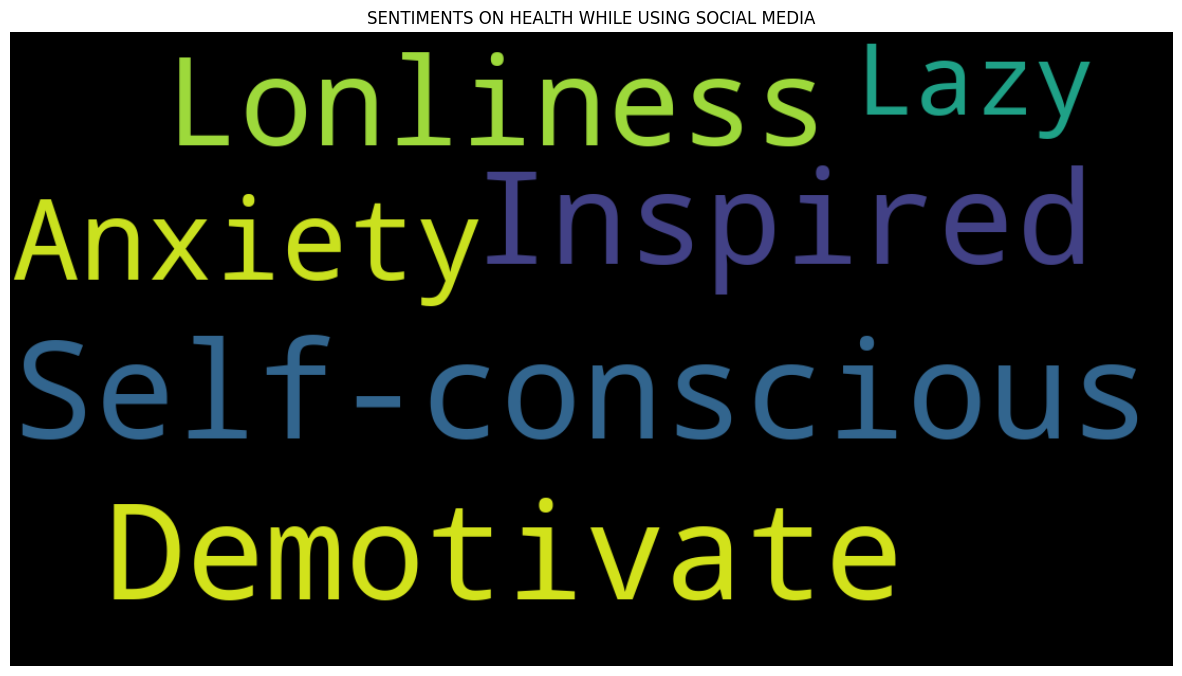

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(review for review in df.SUSMH)

# CALCULATE THE WORD FREQUENCIES OF EACH WORD
words = text.split()
word_freq = Counter(words)

# GENERATE WORD CLOUD GRAPH TO SHOW THE REPITATION OF THE WORD [MORE REPITATION WILL HAVE LARGER  WORD SIZE]
wordcloud = WordCloud(background_color='black',width=1100, height=600,
                      colormap='viridis', collocations=False).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('SENTIMENTS ON HEALTH WHILE USING SOCIAL MEDIA')
plt.show()

In [ ]:
# Print word frequencies
print("Word Frequencies:")
for word, freq in word_freq.items():
    print(f"{word}: {freq}")

Word Frequencies:
Lazy: 20
Demotivate: 35
Anxiety: 26
Self-conscious: 36
Lonliness: 30
Inspired: 33


In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS SMDY, AGE, SEX, SCREEN TIME, SLEEP DURATION

# SMDY ----> SOCIAL MEDIA DISTRACTED YOU

df_selected = df[['SMDY', 'AGE', 'SEX', 'SCREEN TIME', 'SLEEP DURATION']]
df_selected.head(10)

SMDY  AGE     SEX  SCREEN TIME  SLEEP DURATION
0     NOT DISTRACTED   23  Female            2               7
1     NOT DISTRACTED   20    Male            4               8
2     NOT DISTRACTED   19  Female            3               8
3     NOT DISTRACTED   19    Male            3               5
4     NOT DISTRACTED   18  Female            2               7
5     NOT DISTRACTED   18    Male            4               7
6  ALWAYS DISTRACTED   25    Male            4               7
7  ALWAYS DISTRACTED   19  Female            3               5
8  ALWAYS DISTRACTED   23    Male            4               7
9  ALWAYS DISTRACTED   21    Male            3               7

In [ ]:
# USING THE HISTOGRAM AND SHOW THE HOW MANY PEOPLE ARE DISTRACTED FROM THE SOCIAL MEDIA ON THE BASIS OF AGE

# SMDY ----> SOCIAL MEDIA DISTRACTED YOU

fig = px.histogram(df, x="SMDY", color="AGE", hover_data=['SEX','SCREEN TIME', 'SLEEP DURATION'],
                   title='ANALYZE HOW MANY PERSON ARE DISTRACTED FROM THE SOCIAL MEDIA ON THE BASIS OF AGE')
fig.show()


In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS SMDY, AGE, SEX, SCREEN TIME, SLEEP DURATION

# SMDY ----> SOCIAL MEDIA DISTRACTED YOU

df_selected = df[['SMDY']]
df_selected.head(15)

SMDY
0      NOT DISTRACTED
1      NOT DISTRACTED
2      NOT DISTRACTED
3      NOT DISTRACTED
4      NOT DISTRACTED
5      NOT DISTRACTED
6   ALWAYS DISTRACTED
7   ALWAYS DISTRACTED
8   ALWAYS DISTRACTED
9   ALWAYS DISTRACTED
10  ALWAYS DISTRACTED
11  ALWAYS DISTRACTED
12     NOT DISTRACTED
13     NOT DISTRACTED
14     NOT DISTRACTED

In [ ]:
distracted_df = df["SMDY"]

# Create a pie chart
fig = px.pie(distracted_df, names='SMDY', title='SHOW THE HOW MANY PEOPLES ARE DISTRACTED OR NOT')
# Show the pie chart
fig.show()


In [ ]:
# SHOW THE COLUMNS WHOSE NAMED AS SEX, AGE, RBUP, WUSMP, SCREEN TIME , SLEEP DURATION, SUSMH, SMDY

# RBUP ----> REGULARLY BASED USED PLATFORM
# WUSMP ----> WHY USE SOCIAL MEDIA PLATFORM
# SUSMH ----> SENTIMENT USING SOCIAL MEDIA ON HEALTH
# SMDY ----> SOCIAL MEDIA DISTRACTED YOU

df_selected = df[['SEX','AGE', 'RBUP', 'WUSMP','SCREEN TIME','SLEEP DURATION', 'SUSMH', 'SMDY']]
df_selected.head(10)

SEX  AGE       RBUP                WUSMP  SCREEN TIME  SLEEP DURATION  \
0  Female   23   LinkedIn  Information sharing            2               7   
1    Male   20  Instagram       Enterntainment            4               8   
2  Female   19   whatsapp  Information sharing            3               8   
3    Male   19   LinkedIn  Information sharing            3               5   
4  Female   18  Instagram    Personal Branding            2               7   
5    Male   18   facebook    Personal Branding            4               7   
6    Male   25    twitter  Information sharing            4               7   
7  Female   19   snapchat       Enterntainment            3               5   
8    Male   23   snapchat       Enterntainment            4               7   
9    Male   21  Instagram       Enterntainment            3               7   

            SUSMH               SMDY  
0            Lazy     NOT DISTRACTED  
1      Demotivate     NOT DISTRACTED  
2         Anxiety     NOT DISTRACTED  
3  Self-conscious     NOT DISTRACTED  
4         Anxiety     NOT DISTRACTED  
5  Self-conscious     NOT DISTRACTED  
6      Demotivate  ALWAYS DISTRACTED  
7            Lazy  ALWAYS DISTRACTED  
8       Lonliness  ALWAYS DISTRACTED  
9        Inspired  ALWAYS DISTRACTED

In [ ]:
# CREATE A SUNBURST TO ANALYZE WHY MANY PEOPLES ARE EFFECTED FROM THE SOCIAL MEDIA
fig=px.sunburst(df,path=['SEX','AGE', 'RBUP', 'WUSMP','SCREEN TIME','SLEEP DURATION', 'SUSMH', 'SMDY'],hover_data=['SCREEN TIME','SLEEP DURATION'],
                maxdepth=2,width=1000,height=800,color_continuous_scale='RdBu',
                title='ANALYZE WHY MANY PEOPLES ARE EFFECTED FROM THE SOCIAL MEDIA ')
fig.show()

## **ANALYSIS PART WILL BE START**

In [ ]:
# READ DATA FROM THE CSV FILE
df = pd.read_csv("/content/SOCIAL MEDIA ANALYSIS PROJECT.csv")
df1=df.drop(columns=['DOB'])
df1.head(10)


AGE  INSTAGRAM [SPENT TIME(IN HOURS)]  WHATS APP [SPENT TIME(IN HOURS)]  \
0   23                                 3                                 1   
1   20                                 4                                 3   
2   19                                 2                                 1   
3   19                                 3                                 1   
4   18                                 2                                 2   
5   18                                 1                                 2   
6   25                                 3                                 1   
7   19                                 2                                 2   
8   23                                 3                                 2   
9   21                                 4                                 3   

   LinkedIn [SPENT TIME(IN HOURS)]  FACEBOOK [SPENT TIME(IN HOURS)]  \
0                                1                                1   
1                                3                                0   
2                                1                                0   
3                                1                                2   
4                                2                                2   
5                                2                                1   
6                                3                                3   
7                                2                                2   
8                                2                                2   
9                                3                                0   

   SNAPCHAT [SPENT TIME(IN HOURS)]  TWITTER [SPENT TIME(IN HOURS)]  \
0                                1                               2   
1                                2                               2   
2                                3                               1   
3                                2                               4   
4                                2                               1   
5                                1                               3   
6                                3                               1   
7                                2                               1   
8                                2                               2   
9                                3                               2   

   SLEEP DURATION  SCREEN TIME     SEX               SMDY       RBUP  \
0               7            2  Female     NOT DISTRACTED   LinkedIn   
1               8            4    Male     NOT DISTRACTED  Instagram   
2               8            3  Female     NOT DISTRACTED   whatsapp   
3               5            3    Male     NOT DISTRACTED   LinkedIn   
4               7            2  Female     NOT DISTRACTED  Instagram   
5               7            4    Male     NOT DISTRACTED   facebook   
6               7            4    Male  ALWAYS DISTRACTED    twitter   
7               5            3  Female  ALWAYS DISTRACTED   snapchat   
8               7            4    Male  ALWAYS DISTRACTED   snapchat   
9               7            3    Male  ALWAYS DISTRACTED  Instagram   

                 WUSMP SMNDT           SUSMH            SMISC             RIFF  
0  Information sharing   Yes            Lazy  Negative Impact  Negative Impact  
1       Enterntainment    No      Demotivate  Negative Impact  Positive Impact  
2  Information sharing   Yes         Anxiety  Positive impact  Positive Impact  
3  Information sharing   Yes  Self-conscious  Positive impact  Negative Impact  
4    Personal Branding   Yes         Anxiety  Positive impact  Positive Impact  
5    Personal Branding   Yes  Self-conscious  Positive impact  Negative Impact  
6  Information sharing    No      Demotivate  Negative Impact  Negative Impact  
7       Enterntainment   Yes            Lazy  Negative Impact        No change  
8       Enterntainment    No       Lonliness  Positive impact        

In [ ]:
df2 = df1.iloc[:, 0:9]
df2.head(10)

AGE  INSTAGRAM [SPENT TIME(IN HOURS)]  WHATS APP [SPENT TIME(IN HOURS)]  \
0   23                                 3                                 1   
1   20                                 4                                 3   
2   19                                 2                                 1   
3   19                                 3                                 1   
4   18                                 2                                 2   
5   18                                 1                                 2   
6   25                                 3                                 1   
7   19                                 2                                 2   
8   23                                 3                                 2   
9   21                                 4                                 3   

   LinkedIn [SPENT TIME(IN HOURS)]  FACEBOOK [SPENT TIME(IN HOURS)]  \
0                                1                                1   
1                                3                                0   
2                                1                                0   
3                                1                                2   
4                                2                                2   
5                                2                                1   
6                                3                                3   
7                                2                                2   
8                                2                                2   
9                                3                                0   

   SNAPCHAT [SPENT TIME(IN HOURS)]  TWITTER [SPENT TIME(IN HOURS)]  \
0                                1                               2   
1                                2                               2   
2                                3                               1   
3                                2                               4   
4                                2                               1   
5                                1                               3   
6                                3                               1   
7                                2                               1   
8                                2                               2   
9                                3                               2   

   SLEEP DURATION  SCREEN TIME  
0               7            2  
1               8            4  
2               8            3  
3               5            3  
4               7            2  
5               7            4  
6               7            4  
7               5            3  
8               7            4  
9               7            3

# ***ANALYSIS ON SCREEN TIME & SLEEP DURATION WITH RESPECT TO AGE ***

In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
screen_time = df2.loc[:, ['SCREEN TIME', 'AGE']]
screen_time.head()

SCREEN TIME  AGE
0            2   23
1            4   20
2            3   19
3            3   19
4            2   18

In [ ]:
# EXTRACTING THE REQUIRED FEATYRE AND STORING THEM IN A VARIABLES
sleep_duration = df2.loc[:, ['SLEEP DURATION', 'AGE']]
sleep_duration.head()

SLEEP DURATION  AGE
0               7   23
1               8   20
2               8   19
3               5   19
4               7   18

In [ ]:
# assigning values to the X and Y axis of the graph

X1 =df2['AGE']
y1 = df2['SLEEP DURATION']


# **APPLYING LINEAR REGRESSION MODEL TO PREDICT THE SLEEP DURATION WITH AGE**



In [ ]:
# EXTRACTING FEATURES FOR PREDICTION OF SLEEP DURATION WITH RESPECT TO AGE

# IMPORTING ALL THE MODULES WE NEED TO USE FOR THE ANALYSIS
import pandas as pd                                    # CALLING PANDAS FOR DATA MANUPLATION AND ANALYSIS
import numpy as np                                     # CALLING NUMPY FOR ADDING SUPPORT FOR LARGE,MULTI-DIMENSIONAL ARRAYS AND MATRICES!!!!
import plotly.express as px                            # CALLING PLOTLY.EXPRESS FOR INTERACTIVE DATA VISUALIZATION
import plotly.graph_objects as go                      # CALLING PLOTLY.GRAPGH_OBJECTS FOR INTERACTIVE DATA VISUALIZATION

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import plotly
plotly.io.renderers.default = 'colab'


X1 = df2['AGE'].to_numpy().reshape(-1, 1)
y1 = df2['SLEEP DURATION'].to_numpy().reshape(-1, 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 5)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)

model1 = LinearRegression()       # creating linear Regression model object
model1.fit(X1_train_trans, y1_train)    # training the model

y1_pred = model1.predict(X1_test_trans)

print("R-SCORE FOR LINEAR REGRESSION MODEL:  ",r2_score(y1_pred, y1_test))

y1_pred = model1.predict(poly.transform(X1))

keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))

dict1 = sorted(keydict1.items())

final1 = {}

def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
X1_final = []
Y1_final = []

for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)

X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)

fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='SLEEP DURATION'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='PREDICTED SLEEP DURATION'))

fig.update_layout(
    title="PREDICTION OF SLEEP DURATION WITH AGE",
    xaxis_title="SLEEP DURATION",
    yaxis_title="AGE",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

R-SCORE FOR LINEAR REGRESSION MODEL:   -851.1908685950839


In [ ]:
df = pd.read_csv('/content/TIME SPENT.csv')

# Extracting the required features
sleep_duration_with_age = df[df['SCREEN TIME'] == 4][['AGE','SCREEN TIME', 'SLEEP DURATION']]

# Display the new DataFrame
sleep_duration_with_age.head(10)

AGE  SCREEN TIME  SLEEP DURATION
1    20            4               8
5    18            4               7
6    25            4               7
8    23            4               7
11   21            4               7
13   44            4               7
14   19            4               7
15   19            4               8
16   19            4               5
18   24            4               8

# **PREDICTION OF SLEEP DURATION WHOSE SCREEN TIME IS 4 HOURS WITH RESPECT TO AGE**

In [ ]:
# PREDICTION OF SLEEP DURATION WHOSE SCREEN TIME IS 4 HOURS WITH AGE



X2 = sleep_duration_with_age['AGE'].to_numpy().reshape(-1, 1)
y2 = sleep_duration_with_age['SLEEP DURATION'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.80, random_state = 5)

poly = PolynomialFeatures(degree = 5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)


model2 = LinearRegression()     # creating linear Regression model object
model2.fit(X2_train_trans, y2_train)  # training the model

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SCREEN TIME',r2_score(y2_pred, y2_test))

y2_pred = model2.predict(poly.transform(X2))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))

dict2 = sorted(keydict2.items())

final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final2 = Convert(dict2, final2)

X2_final = []
Y2_final = []


for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()

fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='PREDICTED SLEEP DURATION'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='SLEEP DURATION'))
fig.update_layout(

    title="PREDICTION OF SLEEP DURATION WHOSE SCREEN TIME IS 4 HOURS WITH AGE",
    xaxis_title="AGE",
    yaxis_title="SLEEP DURATION",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

R-SCORE FOR SCREEN TIME -5.906634600444166


In [ ]:
# assigning values to the X and Y axis of the graph
#X2 = sleep_duration_with_age
X2 =df2['AGE']
#y2 = sleep_duration_with_age.values
y2 = df2['SCREEN TIME']
#  SLEEP DURATION---> X1   & SCREEN TIME ----> X2


# **APPLYING LINEAR REGRESSION MODEL TO PREDICT THE SCREEN TIME WITH AGE**



In [ ]:
# EXTRACTING FEATURES FOR PREDICTION OF SCREEN TIME WITH RESPECT TO AGE

X2 = df2['AGE'].to_numpy().reshape(-1, 1)
y2 = df2['SCREEN TIME'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.80, random_state = 5)

poly = PolynomialFeatures(degree = 5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)


model2 = LinearRegression()     # creating linear Regression model object
model2.fit(X2_train_trans, y2_train)  # training the model

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SCREEN TIME',r2_score(y2_pred, y2_test))

y2_pred = model2.predict(poly.transform(X2))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))

dict2 = sorted(keydict2.items())

final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final2 = Convert(dict2, final2)

X2_final = []
Y2_final = []


for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)
fig = go.Figure()

fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='PREDICTED SCREEN TIME'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='SCREEN TIME'))
fig.update_layout(

    title="PREDICTION OF SCREEN TIME WITH AGE",
    xaxis_title="AGE",
    yaxis_title="SCREEN TIME",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

R-SCORE FOR SCREEN TIME -53.56985946976166


In [ ]:
df = pd.read_csv('/content/TIME SPENT.csv')

# Extracting the required features
screen_time_with_age = df[df['SLEEP DURATION'] == 8][['AGE', 'SLEEP DURATION', 'SCREEN TIME']]

# Display the new DataFrame
screen_time_with_age.head(10)

AGE  SLEEP DURATION  SCREEN TIME
1    20               8            4
2    19               8            3
15   19               8            4
18   24               8            4
19   56               8            4
25   20               8            3
26   19               8            3
36   19               8            3
44   17               8            3
51   16               8            3

# **PREDICTION OF SCREEN TIME WHOSE SLEEP DURATION IS 8 HOURS WITH AGE**

In [ ]:

# assigning values to the X and Y axis of the graph
#X1 = screen_time_with_age
X1 =screen_time_with_age['AGE']
#X1
#y1 = screen_time_with_age.values
y1 = screen_time_with_age['SCREEN TIME']
#  SLEEP DURATION---> X1   & SCREEN TIME ----> X2

# EXTRACTING FEATURES FOR PREDICTION OF SCREEN TIME OF 8 HOURS SLEEP DURATION WITH AGE

X1 =  screen_time_with_age['AGE'].to_numpy().reshape(-1, 1)
y1 =  screen_time_with_age['SCREEN TIME'].to_numpy().reshape(-1, 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 5)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)

model1 = LinearRegression()       # creating linear Regression model object
model1.fit(X1_train_trans, y1_train)    # training the model

y1_pred = model1.predict(X1_test_trans)

print("R-SCORE FOR LINEAR REGRESSION MODEL:  ",r2_score(y1_pred, y1_test))

y1_pred = model1.predict(poly.transform(X1))

keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))

dict1 = sorted(keydict1.items())

final1 = {}

def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)
X1_final = []
Y1_final = []

for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)

X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)

fig = go.Figure()
fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='PREDICTED SCREEN TIME'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='SCREEN TIME'))

fig.update_layout(
    title="PREDICTION OF SCREEN TIME OF 8 HOURS SLEEP DURATION WITH AGE",
    xaxis_title="AGE",
    yaxis_title="SCREEN TIME",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

R-SCORE FOR LINEAR REGRESSION MODEL:   -153.52849174117793


# ***ANALYSIS ON WHICH PLATFORM IS USED FOR WHICH AGE GROUP AND WHAT'S THE SCREEN TIME ***

In [ ]:
df3 = df1.iloc[:, 0:9]
df3.head(10)

AGE  INSTAGRAM [SPENT TIME(IN HOURS)]  WHATS APP [SPENT TIME(IN HOURS)]  \
0   23                                 3                                 1   
1   20                                 4                                 3   
2   19                                 2                                 1   
3   19                                 3                                 1   
4   18                                 2                                 2   
5   18                                 1                                 2   
6   25                                 3                                 1   
7   19                                 2                                 2   
8   23                                 3                                 2   
9   21                                 4                                 3   

   LinkedIn [SPENT TIME(IN HOURS)]  FACEBOOK [SPENT TIME(IN HOURS)]  \
0                                1                                1   
1                                3                                0   
2                                1                                0   
3                                1                                2   
4                                2                                2   
5                                2                                1   
6                                3                                3   
7                                2                                2   
8                                2                                2   
9                                3                                0   

   SNAPCHAT [SPENT TIME(IN HOURS)]  TWITTER [SPENT TIME(IN HOURS)]  \
0                                1                               2   
1                                2                               2   
2                                3                               1   
3                                2                               4   
4                                2                               1   
5                                1                               3   
6                                3                               1   
7                                2                               1   
8                                2                               2   
9                                3                               2   

   SLEEP DURATION  SCREEN TIME  
0               7            2  
1               8            4  
2               8            3  
3               5            3  
4               7            2  
5               7            4  
6               7            4  
7               5            3  
8               7            4  
9               7            3

In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
snapchat_screen_time = df3.loc[:, ['SCREEN TIME', 'AGE',  'SNAPCHAT [SPENT TIME(IN HOURS)]']]
snapchat_screen_time.head()

SCREEN TIME  AGE  SNAPCHAT [SPENT TIME(IN HOURS)]
0            2   23                                1
1            4   20                                2
2            3   19                                3
3            3   19                                2
4            2   18                                2

In [ ]:
# assigning values to the X and Y axis of the graph

X1 =df3['AGE']
y1 = df3['SNAPCHAT [SPENT TIME(IN HOURS)]']




# **PREDICTION ON HOW MUCH TIME SPENT ON SNPACHAT WITH RESPECT TO THEIR AGE**

In [ ]:
# Snapchat data processing
X2 = df3['AGE'].to_numpy().reshape(-1, 1)
y2 = df3['SNAPCHAT [SPENT TIME(IN HOURS)]'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL:', r2_score(y2_pred, y2_test))

y2_pred = model2.predict(poly.transform(X2))

keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = Convert(dict2, {})
X2_final = []
Y2_final = []
for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)

# Creating the combined plot with bubble and line charts
fig = go.Figure()

# Adding Snapchat data as bubbles and lines

fig.add_trace(go.Scatter(
    x=X2.T[0],
    y=y2.T[0],
    mode='markers',
    marker=dict(size=y2.T[0] * 10, opacity=0.5),
    name='ACTUAL TIME SPENT'
))
fig.add_trace(go.Scatter(
    x=X2_final,
    y=Y2_final.T[0],
    mode='lines',
    line=dict(width=2, color='RED'),
    name='PREDICTED TIME SPENT'
))

# Updating the layout of the chart
fig.update_layout(
    title="PREDICTION OF TIME SPENT ON SNAPCHAT WITH AGE",
    xaxis_title="AGE",
    yaxis_title="TIME SPENT (IN HOURS)",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig.show()


R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL: -32.0209796019075


In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
snapchat_screen_time = df3.loc[:, ['SCREEN TIME', 'AGE',  'INSTAGRAM [SPENT TIME(IN HOURS)]']]
snapchat_screen_time.head()

SCREEN TIME  AGE  INSTAGRAM [SPENT TIME(IN HOURS)]
0            2   23                                 3
1            4   20                                 4
2            3   19                                 2
3            3   19                                 3
4            2   18                                 2

In [ ]:
# assigning values to the X and Y axis of the graph

X1 =df3['AGE']
y1 = df3['INSTAGRAM [SPENT TIME(IN HOURS)]']


# **PREDICTION ON HOW MUCH TIME SPENT ON INSTAGRAM WITH RESPECT TO THEIR AGE**

In [ ]:
# Assuming df3 is your DataFrame containing 'AGE' and 'INSTAGRAM [SPENT TIME(IN HOURS)]'
# Instagram data processing
X1 = df3['AGE'].to_numpy().reshape(-1, 1)
y1 = df3['INSTAGRAM [SPENT TIME(IN HOURS)]'].to_numpy().reshape(-1, 1)

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.80, random_state=3)

# Fit the model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predict on the test set
y1_pred = model1.predict(X1_test)
print("R-SCORE FOR INSTAGRAM LINEAR REGRESSION MODEL: ", r2_score(y1_test, y1_pred))

# Predict on the entire dataset
y1_pred = model1.predict(X1)

# Create a DataFrame with the results for easier processing
df_result = pd.DataFrame({'AGE': X1.flatten(), 'ACTUAL_TIME_SPENT': y1.flatten(), 'PREDICTED_TIME_SPENT': y1_pred.flatten()})

# Group by age and calculate the mean actual and predicted time spent
df_grouped = df_result.groupby('AGE').mean().reset_index()

# Create a bar graph for actual time spent
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_grouped['AGE'],
    y=df_grouped['ACTUAL_TIME_SPENT'],
    name='Actual Time Spent',
    opacity=0.6
))

# Add a line chart for predicted time spent
fig.add_trace(go.Scatter(
    x=df_grouped['AGE'],
    y=df_grouped['PREDICTED_TIME_SPENT'],
    mode='lines',
    line=dict(width=2, color='BLACK'),
    name='Predicted Time Spent'
))

# Update the layout
fig.update_layout(
    title="PREDICTION OF TIME SPENT ON INSTAGRAM WITH AGE",
    xaxis_title="AGE",
    yaxis_title="TIME SPENT (IN HOURS)",
    font=dict(
        family="Segoe UI",
        size=18,
    ),
    barmode='overlay'
)

# Show the plot
fig.show()


R-SCORE FOR INSTAGRAM LINEAR REGRESSION MODEL:  -0.02769862332536932


In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
snapchat_screen_time = df3.loc[:, ['SCREEN TIME', 'AGE',  'WHATS APP [SPENT TIME(IN HOURS)]']]
snapchat_screen_time.head()


SCREEN TIME  AGE  WHATS APP [SPENT TIME(IN HOURS)]
0            2   23                                 1
1            4   20                                 3
2            3   19                                 1
3            3   19                                 1
4            2   18                                 2

In [ ]:
# assigning values to the X and Y axis of the graph

X1 =df3['AGE']
y1 = df3['INSTAGRAM [SPENT TIME(IN HOURS)]']


# **PREDICTION ON HOW MUCH TIME SPENT ON WHATS APP WITH RESPECT TO THEIR AGE**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import plotly.graph_objs as go

# Assuming df2 is your DataFrame containing 'AGE' and 'WHATS APP [SPENT TIME(IN HOURS)]'

# WhatsApp data processing
X2 = df3['AGE'].to_numpy().reshape(-1, 1)
y2 = df3['WHATS APP [SPENT TIME(IN HOURS)]'].to_numpy().reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR WHATSAPP LINEAR REGRESSION MODEL:', r2_score(y2_test, y2_pred))

y2_pred_all = model2.predict(poly.transform(X2))

keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final2 = Convert(dict2, final2)

X2_final = []
Y2_final = []
for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)

# Creating the dumbbell chart
fig = go.Figure()

# Adding dumbbell chart
fig.add_trace(go.Scatter(
    x=X2.T[0],
    y=y2.T[0],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='Actual Time Spent'
))

fig.add_trace(go.Scatter(
    x=X2.T[0],
    y=y2_pred_all.T[0],
    mode='markers',
    marker=dict(size=10, color='black'),
    name='Predicted Time Spent'
))

# Updating the layout of the chart
fig.update_layout(
    title="Prediction of How Much Time Spent on WhatsApp with Age",
    xaxis_title="Age",
    yaxis_title="Time Spent (in Hours)",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig.show()


R-SCORE FOR WHATSAPP LINEAR REGRESSION MODEL: 0.028522825045954048


In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
facebook_screen_time = df3.loc[:, ['SCREEN TIME', 'AGE',  'FACEBOOK [SPENT TIME(IN HOURS)]']]
facebook_screen_time.head()



SCREEN TIME  AGE  FACEBOOK [SPENT TIME(IN HOURS)]
0            2   23                                1
1            4   20                                0
2            3   19                                0
3            3   19                                2
4            2   18                                2

In [ ]:
# assigning values to the X and Y axis of the graph

X2 =df3['AGE']
y2 = df3['FACEBOOK [SPENT TIME(IN HOURS)]']


# **PREDICTION ON HOW MUCH TIME SPENT ON FACEBOOK WITH RESPECT TO THEIR AGE**

In [ ]:
# Assuming df3 is your DataFrame containing 'AGE' and 'FACEBOOK [SPENT TIME(IN HOURS)]'

# EXTRACTING FEATURES FOR PREDICTION OF SCREEN TIME WITH RESPECT TO AGE
X2 = df3['AGE'].to_numpy().reshape(-1, 1)
y2 = df3['FACEBOOK [SPENT TIME(IN HOURS)]'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

poly = PolynomialFeatures(degree=5)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SCREEN TIME:', r2_score(y2_test, y2_pred))

y2_pred = model2.predict(poly.transform(X2))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final2 = Convert(dict2, final2)

X2_final = []
Y2_final = []

for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)

# Creating scatter plot chart
fig = go.Figure()

fig.add_trace(go.Scatter(x=X2_final, y=Y2_final.T[0], mode='markers', name='Predicted Time Spent'))
fig.add_trace(go.Scatter(x=X2.T[0], y=y2.T[0], mode='markers', name='Actual Time Spent'))

# Updating the layout of the chart
fig.update_layout(
    title="Prediction of How Much Time Spent on Facebook with Age",
    xaxis_title="Age",
    yaxis_title="Time Spent (in Hours)",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig.show()


R-SCORE FOR SCREEN TIME: 0.06109102441434222


In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
linkedin_screen_time = df3.loc[:, ['SCREEN TIME', 'AGE',  'LinkedIn [SPENT TIME(IN HOURS)]']]
linkedin_screen_time.head()


SCREEN TIME  AGE  LinkedIn [SPENT TIME(IN HOURS)]
0            2   23                                1
1            4   20                                3
2            3   19                                1
3            3   19                                1
4            2   18                                2

In [ ]:
# assigning values to the X and Y axis of the graph

X2 =df3['AGE']
y2 = df3['LinkedIn [SPENT TIME(IN HOURS)]']


In [ ]:
# Snapchat data processing
X2 = df3['AGE'].to_numpy().reshape(-1, 1)
y2 = df3['LinkedIn [SPENT TIME(IN HOURS)]'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL:', r2_score(y2_pred, y2_test))

y2_pred = model2.predict(poly.transform(X2))

keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = Convert(dict2, {})
X2_final = []
Y2_final = []
for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)

# Creating the combined plot with bubble and line charts
fig = go.Figure()

# Adding Snapchat data as bubbles and lines

fig.add_trace(go.Scatter(
    x=X2.T[0],
    y=y2.T[0],
    mode='markers',
    marker=dict(size=y2.T[0] * 10, opacity=0.5),
    name='ACTUAL TIME SPENT'
))
fig.add_trace(go.Scatter(
    x=X2_final,
    y=Y2_final.T[0],
    mode='lines',
    line=dict(width=2, color='BLACK'),
    name='PREDICTED TIME SPENT'
))

# Updating the layout of the chart
fig.update_layout(
    title="PREDICTION OF HOW MUCH TIME SPENT ON LINKEDIN WITH AGE",
    xaxis_title="AGE",
    yaxis_title="TIME SPENT (IN HOURS)",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig.show()


R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL: -22.381519075059423


In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
twitter_screen_time = df3.loc[:, ['SCREEN TIME', 'AGE',  'TWITTER [SPENT TIME(IN HOURS)]']]
twitter_screen_time.head()


SCREEN TIME  AGE  TWITTER [SPENT TIME(IN HOURS)]
0            2   23                               2
1            4   20                               2
2            3   19                               1
3            3   19                               4
4            2   18                               1

In [ ]:
# assigning values to the X and Y axis of the graph

X2 =df3['AGE']
y2 = df3['TWITTER [SPENT TIME(IN HOURS)]']


In [ ]:
import plotly.graph_objs as go

# Assuming df3 is your DataFrame containing 'AGE' and 'TWITTER [SPENT TIME(IN HOURS)]'

# Extracting features for prediction of screen time with respect to age
X2 = df3['AGE'].to_numpy().reshape(-1, 1)
y2 = df3['TWITTER [SPENT TIME(IN HOURS)]'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

poly = PolynomialFeatures(degree=5)
X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SCREEN TIME:', r2_score(y2_test, y2_pred))

y2_pred = model2.predict(poly.transform(X2))
keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final2 = Convert(dict2, final2)

X2_final = []
Y2_final = []

for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)

# Creating a scatter plot chart
fig = go.Figure()

fig.add_trace(go.Scatter(x=X2_final, y=Y2_final.T[0], mode='markers', name='Predicted Time Spent'))
fig.add_trace(go.Scatter(x=X2.T[0], y=y2.T[0], mode='markers', name='Actual Time Spent'))

# Updating the layout of the chart
fig.update_layout(
    title="PREDICTION OF HOW MUCH TIME SPENT ON TWITTER WITH THEIR AGE ",
    xaxis_title="Age",
    yaxis_title="Time Spent (in Hours)",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig.show()


R-SCORE FOR SCREEN TIME: -0.061241026120375075


# **IT'S TIME TO START THE VISUALIZING ON SENTIMENTS**

In [ ]:
# READ DATA FROM THE CSV FILE
df4 = pd.read_csv("/content/SENTIMENTS USING SOCIAL MEDIA.csv")
df4=df4.drop(columns=['DOB'])
df4.head(15)


AGE  INSTAGRAM [SPENT TIME(IN HOURS)]  WHATS APP [SPENT TIME(IN HOURS)]  \
0    23                                 3                                 1   
1    20                                 4                                 3   
2    19                                 2                                 1   
3    19                                 3                                 1   
4    18                                 2                                 2   
5    18                                 1                                 2   
6    25                                 3                                 1   
7    19                                 2                                 2   
8    23                                 3                                 2   
9    21                                 4                                 3   
10   20                                 2                                 2   
11   21                                 3                                 2   
12   21                                 1                                 1   
13   44                                 2                                 2   
14   19                                 3                                 3   

    LinkedIn [SPENT TIME(IN HOURS)]  FACEBOOK [SPENT TIME(IN HOURS)]  \
0                                 1                                1   
1                                 3                                0   
2                                 1                                0   
3                                 1                                2   
4                                 2                                2   
5                                 2                                1   
6                                 3                                3   
7                                 2                                2   
8                                 2                                2   
9                                 3                                0   
10                                2                                2   
11                                2                                1   
12                                1                                1   
13                                2                                2   
14                                3                                3   

    SNAPCHAT [SPENT TIME(IN HOURS)]  TWITTER [SPENT TIME(IN HOURS)]  \
0                                 1                               2   
1                                 2                               2   
2                                 3                               1   
3                                 2                               4   
4                                 2                               1   
5                                 1                               3   
6                                 3                               1   
7                                 2                               1   
8                                 2                               2   
9                                 3                               2   
10                                2                               1   
11                                2                               0   
12                                1                               0   
13                                2                               0   
14                                3                               1   

    SLEEP DURATION  SCREEN TIME     SEX  ...  ANXIETY [IN %]  \
0                7            2  Female  ...              60   
1                8            4    Male  ...              90   
2                8            3  Female  ...              80   
3                5            3    Male  ...              90   
4                7            2  Female  ...              80   
5                7            4    Male  ...              70   
6



# **TO VISUALIZE THE SENTIMENTS ON HEALTH WHILE USING THE SOCIAL MEDIA BY THEIR AGE & SEX**

In [ ]:
# SELECT THE COLUMNS SMDY , AGE & SEX

# SMDY -->  SOCIAL MEDIA DISTRACTED YOU
distracted_users = df4[['SMDY [IN %]', 'AGE', 'SEX']]

# Show the data
distracted_users.head(10)


SMDY [IN %]  AGE     SEX
0           60   23  Female
1           70   20    Male
2           70   19  Female
3           80   19    Male
4           70   18  Female
5           80   18    Male
6           60   25    Male
7           80   19  Female
8           80   23    Male
9           30   21    Male

In [ ]:
# SHOW THE SOCIAL MEDIA DSTRACTED BY AGE & GENDER

fig_bubble = px.scatter(distracted_users,
                        x='AGE',
                        y='SMDY [IN %]',
                        size='SMDY [IN %]',
                        color='AGE',
                        hover_name='SEX',
                        title='SHOW THE SOCIAL MEDIA DSTRACTED BY AGE & GENDER',
                        labels={'SMDY [IN %]': 'DISTRACTION [IN %]', 'AGE': 'AGE'})

# Show the bubble chart
fig_bubble.show()

In [ ]:
# SELECT THE COLUMNS LAZY , AGE & SEX
lazy_users = df4[['LAZY [IN %]', 'AGE', 'SEX']]

# Show the data
lazy_users.head(10)


LAZY [IN %]  AGE     SEX
0           80   23  Female
1           30   20    Male
2           20   19  Female
3           50   19    Male
4           80   18  Female
5           80   18    Male
6           80   25    Male
7           70   19  Female
8           60   23    Male
9           20   21    Male

In [ ]:
# DISTRIBUTION OF LAZINESS BY AGE & GENDER

fig = px.scatter(lazy_users,x="AGE", y="LAZY [IN %]", size="AGE", color="SEX",
                 log_x=True, size_max=60, title='DISTRIBUTION OF LAZINESS BY AGE & GENDER',
                  labels={'LAZY [IN %]': 'LAZINESS [IN %] ', 'AGE': 'AGE'})
fig.show()

In [ ]:
# SELECT THE COLUMNS LAZY , AGE & SEX
demotivate_users = df4[['DEMOTIVATE [IN %]', 'AGE', 'SEX']]

# Show the data
demotivate_users.head(10)


DEMOTIVATE [IN %]  AGE     SEX
0                 95   23  Female
1                 70   20    Male
2                 80   19  Female
3                 60   19    Male
4                 95   18  Female
5                 60   18    Male
6                 60   25    Male
7                 50   19  Female
8                 39   23    Male
9                 50   21    Male

In [ ]:
# VISUALAIZE THE DEMOTIVATION BY AGE AND GENDER

# CREATE THE LINE CHART
fig_line = px.scatter(demotivate_users,
                          x='AGE',
                          y='DEMOTIVATE [IN %]',
                          color='AGE',
                          title='VISUALAIZE THE DEMOTIVATION BY AGE AND GENDER',
                          labels={'AGE': 'AGE', 'DEMOTIVATE [IN %]': 'DEMOTIVATION [IN %]'},
                      hover_data = 'SEX')

# ADD LINES CONNECTING THE DOTS
fig_line.update_traces(mode='lines+markers')

# Show the dumbbell plot
fig_line.show()


In [ ]:
# SELECT THE COLUMNS ANXIETY , AGE & SEX
anxiety_users = df4[['ANXIETY [IN %]', 'AGE', 'SEX']]

# Show the data
anxiety_users.head(10)


ANXIETY [IN %]  AGE     SEX
0              60   23  Female
1              90   20    Male
2              80   19  Female
3              90   19    Male
4              80   18  Female
5              70   18    Male
6              70   25    Male
7              60   19  Female
8              20   23    Male
9              20   21    Male

In [ ]:
# VISUALAIZE THE ANXIETY BY AGE AND GENDER

fig = px.pie(df4, names="ANXIETY [IN %]", values="AGE", color="AGE",
            title='VISUALAIZE THE ANXIETY BY AGE AND GENDER',
            labels={'AGE': 'AGE', 'DEMOTIVATE [IN %]': 'ANXIETY [IN %]'})

fig.show()

In [ ]:
# SELECT THE COLUMNS SELF-CONSCIOUS , AGE & SEX
self_conscious_users = df4[['SELF-CONSCIOUS [IN %]', 'AGE', 'SEX']]

# Show the data
self_conscious_users.head(10)


SELF-CONSCIOUS [IN %]  AGE     SEX
0                     90   23  Female
1                     30   20    Male
2                     80   19  Female
3                     70   19    Male
4                     80   18  Female
5                     60   18    Male
6                     30   25    Male
7                     90   19  Female
8                     30   23    Male
9                     30   21    Male

In [ ]:
# DISTRIBUTION OF SELF-CONSCIOUS BY AGE AND GENDER

fig_hist = px.histogram(self_conscious_users,
                        x='SELF-CONSCIOUS [IN %]',
                        color='AGE',
                        title='DISTRIBUTION OF SELF-CONSCIOUS BY AGE AND GENDER')

# Show the histogram
fig_hist.show()

In [ ]:
# SELECT THE COLUMNS LONELINESS , AGE & SEX
loneliness_users = df4[['LONELINESS [IN %]', 'AGE', 'SEX']]

# Show the data
loneliness_users.head(10)


LONELINESS [IN %]  AGE     SEX
0                 20   23  Female
1                 80   20    Male
2                 20   19  Female
3                 50   19    Male
4                 20   18  Female
5                 70   18    Male
6                 60   25    Male
7                 20   19  Female
8                 50   23    Male
9                 20   21    Male

In [ ]:
# VISUALAIZE THE DEMOTIVATION BY AGE AND GENDER

# CREATE THE LINE CHART
fig_line = px.scatter(loneliness_users,
                          x='AGE',
                          y='LONELINESS [IN %]',
                          color='AGE',
                          title='VISUALAIZE THE LONELINESS BY AGE AND GENDER',
                          labels={'AGE': 'AGE', 'DEMOTIVATE [IN %]': 'LONELINESS [IN %]'},
                      hover_data = 'SEX')

# ADD LINES CONNECTING THE DOTS
fig_line.update_traces(mode='lines+markers')

# Show the dumbbell plot
fig_line.show()


In [ ]:
# SELECT THE COLUMNS LONELINESS , AGE & SEX
inspired_users = df4[['INSPIRED [IN %]', 'AGE', 'SEX']]

# Show the data
inspired_users.head(10)


INSPIRED [IN %]  AGE     SEX
0               40   23  Female
1               80   20    Male
2               60   19  Female
3               80   19    Male
4               60   18  Female
5               50   18    Male
6               80   25    Male
7               40   19  Female
8               90   23    Male
9               40   21    Male

In [ ]:
# DISTRIBUTION OF INSPIRED BY AGE & GENDER

fig = px.scatter(inspired_users,x="AGE", y="INSPIRED [IN %]", size="AGE", color="AGE",
                 log_x=True, size_max=60, title='DISTRIBUTION OF INSPIRED BY AGE & GENDER',
                  labels={'INSPIRED [IN %]': 'INSPIRED [IN %] ', 'AGE': 'AGE'},
                 hover_data='SEX')
fig.show()

# ***IT'S TIME TO START THE ANALYZING & PREDICTION FOR THE SENTIMENTS WHILE USING THE SOCIAL MEDIA  ***

In [ ]:
# READ DATA FROM THE CSV FILE
df5 = pd.read_csv("/content/SENTIMENTS USING SOCIAL MEDIA.csv")
df5=df5.drop(columns=['DOB'])
df5.head(10)


AGE  INSTAGRAM [SPENT TIME(IN HOURS)]  WHATS APP [SPENT TIME(IN HOURS)]  \
0   23                                 3                                 1   
1   20                                 4                                 3   
2   19                                 2                                 1   
3   19                                 3                                 1   
4   18                                 2                                 2   
5   18                                 1                                 2   
6   25                                 3                                 1   
7   19                                 2                                 2   
8   23                                 3                                 2   
9   21                                 4                                 3   

   LinkedIn [SPENT TIME(IN HOURS)]  FACEBOOK [SPENT TIME(IN HOURS)]  \
0                                1                                1   
1                                3                                0   
2                                1                                0   
3                                1                                2   
4                                2                                2   
5                                2                                1   
6                                3                                3   
7                                2                                2   
8                                2                                2   
9                                3                                0   

   SNAPCHAT [SPENT TIME(IN HOURS)]  TWITTER [SPENT TIME(IN HOURS)]  \
0                                1                               2   
1                                2                               2   
2                                3                               1   
3                                2                               4   
4                                2                               1   
5                                1                               3   
6                                3                               1   
7                                2                               1   
8                                2                               2   
9                                3                               2   

   SLEEP DURATION  SCREEN TIME     SEX  ...  ANXIETY [IN %]  \
0               7            2  Female  ...              60   
1               8            4    Male  ...              90   
2               8            3  Female  ...              80   
3               5            3    Male  ...              90   
4               7            2  Female  ...              80   
5               7            4    Male  ...              70   
6               7            4    Male  ...              70   
7               5            3  Female  ...              60   
8               7            4    Male  ...              20   
9               7            3    Male  ...              20   

   SELF-CONSCIOUS [IN %]  LONELINESS [IN %]  INSPIRED [IN %]  SMISC  SMNDT  \
0                     90                 20               40      0      1   
1                     30                 80               80      0      0   
2                     80                 20               60      1      1   
3                     70                 50               80      1      1   
4                     80                 20               60      1      1   
5                     60                 70               50      1      1   
6                     30                 60               80      0      0   
7                     90                 20               40      0      1   
8                     30                 50               90      1      0   
9                     30                 20               40      1      0   

   RIFF  SMNDTT           SMISCC      

In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
smdy = df5.loc[:, ['SMDY [IN %]', 'AGE']]
smdy.head()

SMDY [IN %]  AGE
0           60   23
1           70   20
2           70   19
3           80   19
4           70   18

# **PREDICTION ON HOW MANY PERSONS ARE DISTRACTED FROM SOCIAL MEDIA BY THEIR AGE**

In [ ]:
X1 = df5['AGE'].to_numpy().reshape(-1, 1)
y1 = df5['SMDY [IN %]'].to_numpy().reshape(-1, 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 5)
X1_train_trans = poly.fit_transform(X1_train)
X1_test_trans = poly.transform(X1_test)

model1 = LinearRegression()       # creating linear Regression model object
model1.fit(X1_train_trans, y1_train)    # training the model

y1_pred = model1.predict(X1_test_trans)

print("R-SCORE FOR SLEEP DURATION ",r2_score(y1_pred, y1_test))

y1_pred = model1.predict(poly.transform(X1))

keydict1 = dict(zip(X1.T[0], y1_pred.T[0]))

dict1 = sorted(keydict1.items())

final1 = {}

def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final1 = Convert(dict1, final1)

X1_final = []
Y1_final = []

for i in final1.keys():
  X1_final.append(i)
for i in final1.values():
  Y1_final.append(i)


X1_final = np.array(X1_final)
Y1_final = np.array(Y1_final)


fig = go.Figure()

fig.add_trace(go.Scatter(x = X1_final, y = Y1_final.T[0], mode='lines+markers',name='PREDICTED SMDY'))
fig.add_trace(go.Scatter(x = X1.T[0], y = y1.T[0], mode='lines+markers',name='ACTUAL SMDY'))

fig.update_layout(
    title=" PREDICTION ON HOW MANY PERSONS ARE DISTRACTED FROM SOCIAL MEDIA BY THEIR AGE",
    xaxis_title="AGE",
    yaxis_title="SMDY [IN %]",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

R-SCORE FOR SLEEP DURATION  -301.63565509285337


# **PREDICTION ON HOW MANY PEOPLES ARE LAZYNESS WHILE USING SOCIAL MEDIA BY THEIR AGE**

In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
lazy = df5.loc[:, ['LAZY [IN %]', 'AGE']]
lazy.head()

LAZY [IN %]  AGE
0           80   23
1           30   20
2           20   19
3           50   19
4           80   18

In [ ]:
# assigning values to the X and Y axis of the graph

X2 =df5['AGE']
y2 = df5['LAZY [IN %]']


In [ ]:
X2 = df5['AGE'].to_numpy().reshape(-1, 1)
y2 = df5['LAZY [IN %]'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size = 0.95, random_state = 5)

poly = PolynomialFeatures(degree = 5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)

print('R-SCORE FOR SCREEN TIME',r2_score(y2_pred, y2_test))
y2_pred = model2.predict(poly.transform(X2))

keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))

dict2 = sorted(keydict2.items())

final2 = {}

def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di

final2 = Convert(dict2, final2)

X2_final = []
Y2_final = []

for i in final2.keys():
  X2_final.append(i)
for i in final2.values():
  Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)

fig = go.Figure()

fig.add_trace(go.Scatter(x = X2_final, y = Y2_final.T[0], mode='lines+markers',name='PREDICTED LAZYNESS'))
fig.add_trace(go.Scatter(x = X2.T[0], y = y2.T[0], mode='lines+markers',name='ACTUAL LAZYNESS LAZY [IN %]'))

fig.update_layout(
    title=" PREDICTION ON HOW MANY PEOPLES ARE LAZYNESS WHILE USING SOCIAL MEDIA BY THEIR AGE",
    xaxis_title="AGE",
    yaxis_title="LAZYNESS [IN %]",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)
fig.show()

R-SCORE FOR SCREEN TIME -49.74659168842357


# **PREDICTION OF HOW MANY PEOPLES ARE DEMOTIVATED WHILE USING SOCIAL MEDIA ALONG THEIR AGE**

In [ ]:
# assigning values to the X and Y axis of the graph

X2 =df5['AGE']
y2 = df5['DEMOTIVATE [IN %]']


In [ ]:
# DEMOTIVATION DATA PROCESSING
X2 = df5['AGE'].to_numpy().reshape(-1, 1)
y2 = df5['DEMOTIVATE [IN %]'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL:', r2_score(y2_pred, y2_test))

y2_pred = model2.predict(poly.transform(X2))

keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = Convert(dict2, {})
X2_final = []
Y2_final = []
for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)


fig_scatter = go.Figure()

# Adding the actual demotivation data as markers
fig_scatter.add_trace(go.Scatter(
    x=X2.T[0],  # Ages
    y=y2.T[0],  # Actual demotivation percentages
    mode='markers',
    name='ACTUAL DEMOTIVATION'
))

# Adding the predicted demotivation data as markers
fig_scatter.add_trace(go.Scatter(
    x=X2_final,  # Ages
    y=Y2_final.T[0],  # Predicted demotivation percentages
    mode='lines',
    name='PREDICTED DEMOTIVATION'
))

# Updating the layout of the chart
fig_scatter.update_layout(
    title="PREDICTION HOW MANY PEOPLES ARE DEMOTIVATED USING SOCIAL MEDIA ALONG THEIR AGE",
    xaxis_title="AGE",
    yaxis_title="DEMOTIVATION [IN %]",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig_scatter.show()


R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL: -28.271185142034668


# **PREDICTION ON HOW MANY PEOPLES ARE SUFFERED FROM ANXIETY WHILE USING SOCIAL MEDIA**

In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
anxiety = df5.loc[:, ['ANXIETY [IN %]', 'AGE']]
anxiety.head()

ANXIETY [IN %]  AGE
0              60   23
1              90   20
2              80   19
3              90   19
4              80   18

In [ ]:
# assigning values to the X and Y axis of the graph

X2 =df5['AGE']
y2 = df5['ANXIETY [IN %]']


In [ ]:
# WhatsApp data processing
X2 = df5['AGE'].to_numpy().reshape(-1, 1)
y2 = df5['ANXIETY [IN %]'].to_numpy().reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR WHATSAPP LINEAR REGRESSION MODEL:', r2_score(y2_test, y2_pred))

y2_pred_all = model2.predict(poly.transform(X2))

keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = {}
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, []).append(b)
    return di
final2 = Convert(dict2, final2)

X2_final = []
Y2_final = []
for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)

# Creating the dumbbell chart
fig = go.Figure()

# Adding dumbbell chart
fig.add_trace(go.Scatter(
    x=X2.T[0],
    y=y2.T[0],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='ACTUAL ANXIETY'
))

fig.add_trace(go.Scatter(
    x=X2.T[0],
    y=y2_pred_all.T[0],
    mode='markers',
    marker=dict(size=10, color='black'),
    name='PREDICTED ANXIETY'
))

# Updating the layout of the chart
fig.update_layout(
    title="PREDICTION HOW MANY PEOPLES ARE SUFFERED ANXIETY WHILE USING SOCIAL MEDIA",
    xaxis_title="AGE",
    yaxis_title="ANXIETY [IN %]",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig.show()


R-SCORE FOR WHATSAPP LINEAR REGRESSION MODEL: 0.0100085567584981


# **PREDICTION HOW MANY PEOPLES SUFFERED FROM SELF CONSICOUS WHILE USING SOCIAL MEDIA**

In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
self_conscious = df5.loc[:, ['SELF-CONSCIOUS [IN %]', 'AGE']]
self_conscious.head()

SELF-CONSCIOUS [IN %]  AGE
0                     90   23
1                     30   20
2                     80   19
3                     70   19
4                     80   18

In [ ]:
# ASSIGNING THE VALUE OF X AND Y FOR TRAINING & TESTING THE DATASET
X1 = df5['AGE'].to_numpy().reshape(-1, 1)
y1 = df5['SELF-CONSCIOUS [IN %]'].to_numpy().reshape(-1, 1)

In [ ]:
# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.80, random_state=3)

# Fit the model
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

# Predict on the test set
y1_pred = model1.predict(X1_test)
print("R-SCORE FOR INSTAGRAM LINEAR REGRESSION MODEL: ", r2_score(y1_test, y1_pred))

# Predict on the entire dataset
y1_pred = model1.predict(X1)

# Create a DataFrame with the results for easier processing
df_result = pd.DataFrame({'AGE': X1.flatten(), 'ACTUAL_TIME_SPENT': y1.flatten(), 'PREDICTED_TIME_SPENT': y1_pred.flatten()})

# Group by age and calculate the mean actual and predicted time spent
df_grouped = df_result.groupby('AGE').mean().reset_index()

# Create a bar graph for actual time spent
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_grouped['AGE'],
    y=df_grouped['ACTUAL_TIME_SPENT'],
    name='ACTUAL SELF CONSICOUS',
    opacity=0.6
))

# Add a line chart for predicted time spent
fig.add_trace(go.Scatter(
    x=df_grouped['AGE'],
    y=df_grouped['PREDICTED_TIME_SPENT'],
    mode='lines',
    line=dict(width=2, color='BLACK'),
    name='PREDICTED SELF CONSICOUS'
))

# Update the layout
fig.update_layout(
    title="PREDICTION HOW MANY PEOPLES SUFFERED FROM SELF CONSICOUS WHILE USING SOCIAL MEDIA",
    xaxis_title="AGE",
    yaxis_title=" SELF-CONSICOUS [IN %]",
    font=dict(
        family="Segoe UI",
        size=18,
    ),
    barmode='overlay'
)

# Show the plot
fig.show()


R-SCORE FOR INSTAGRAM LINEAR REGRESSION MODEL:  -0.06122021564414126


# **PREDICTION HOW MANY PEOPLES ARE LONELINESS USING SOCIAL MEDIA ALONG THEIR AGE**

In [ ]:
# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
loneliness = df5.loc[:, ['LONELINESS [IN %]', 'AGE']]
loneliness.head()

LONELINESS [IN %]  AGE
0                 20   23
1                 80   20
2                 20   19
3                 50   19
4                 20   18

In [ ]:
X2 = df5['AGE'].to_numpy().reshape(-1, 1)
y2 = df5['LONELINESS [IN %]'].to_numpy().reshape(-1, 1)

In [ ]:
# DEMOTIVATION DATA PROCESSING
X2 = df5['AGE'].to_numpy().reshape(-1, 1)
y2 = df5['LONELINESS [IN %]'].to_numpy().reshape(-1, 1)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, train_size=0.80, random_state=5)

X2_train_trans = poly.fit_transform(X2_train)
X2_test_trans = poly.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_trans, y2_train)

y2_pred = model2.predict(X2_test_trans)
print('R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL:', r2_score(y2_pred, y2_test))

y2_pred = model2.predict(poly.transform(X2))

keydict2 = dict(zip(X2.T[0], y2_pred.T[0]))
dict2 = sorted(keydict2.items())

final2 = Convert(dict2, {})
X2_final = []
Y2_final = []
for i in final2.keys():
    X2_final.append(i)
for i in final2.values():
    Y2_final.append(i)

X2_final = np.array(X2_final)
Y2_final = np.array(Y2_final)


fig_scatter = go.Figure()

# Adding the actual demotivation data as markers
fig_scatter.add_trace(go.Scatter(
    x=X2.T[0],  # Ages
    y=y2.T[0],  # Actual demotivation percentages
    mode='markers',
    name='ACTUAL LONELINESS'
))

# Adding the predicted demotivation data as markers
fig_scatter.add_trace(go.Scatter(
    x=X2_final,  # Ages
    y=Y2_final.T[0],  # Predicted demotivation percentages
    mode='lines',
    name='PREDICTED LONELINESS'
))

# Updating the layout of the chart
fig_scatter.update_layout(
    title="PREDICTION HOW MANY PEOPLES ARE LONELINESS USING SOCIAL MEDIA ALONG THEIR AGE",
    xaxis_title="AGE",
    yaxis_title="LONELINESS [IN %]",
    font=dict(
        family="Segoe UI",
        size=18,
    )
)

# Showing the plot
fig_scatter.show()


R-SCORE FOR SNAPCHAT LINEAR REGRESSION MODEL: -2100.6398233300038


# **PREDICTION HOW MANY PEOPLES ARE INSPIRED WHILE USING SOCIAL MEDIA**

In [ ]:

# EXTRACTING THE REQUIRED FEATURE AND STORING THEM IN A VARIABLES
inspired_users = df5.loc[:, ['INSPIRED [IN %]', 'AGE']]
inspired_users.head()

INSPIRED [IN %]  AGE
0               40   23
1               80   20
2               60   19
3               80   19
4               60   18

In [ ]:
X1 = df5['AGE'].to_numpy().reshape(-1, 1)
y1 = df5['INSPIRED [IN %]'].to_numpy().reshape(-1, 1)

In [ ]:
X1 = df5['AGE'].to_numpy().reshape(-1, 1)
y1 = df5['INSPIRED [IN %]'].to_numpy().reshape(-1, 1)

# Split the data
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size=0.80, random_state=3)

# Polynomial transformation
poly = PolynomialFeatures(degree=2)  # You can adjust the degree for higher-order polynomials
X1_poly_train = poly.fit_transform(X1_train)
X1_poly_test = poly.transform(X1_test)

# Fit the model
model1 = LinearRegression()
model1.fit(X1_poly_train, y1_train)

# Predict on the test set
y1_pred_test = model1.predict(X1_poly_test)
print("R-SCORE FOR INSTAGRAM POLYNOMIAL REGRESSION MODEL: ", r2_score(y1_test, y1_pred_test))

# Predict on the entire dataset
X1_poly = poly.transform(X1)
y1_pred = model1.predict(X1_poly)

# Create a DataFrame with the results for easier processing
df_result = pd.DataFrame({'AGE': X1.flatten(), 'ACTUAL_TIME_SPENT': y1.flatten(), 'PREDICTED_TIME_SPENT': y1_pred.flatten()})

# Group by age and calculate the mean actual and predicted time spent
df_grouped = df_result.groupby('AGE').mean().reset_index()

# Create a bar graph for actual time spent
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df_grouped['AGE'],
    y=df_grouped['ACTUAL_TIME_SPENT'],
    name='ACTUAL INSPIRED',
    opacity=0.6
))

# Add a line chart for predicted time spent
fig.add_trace(go.Scatter(
    x=df_grouped['AGE'],
    y=df_grouped['PREDICTED_TIME_SPENT'],
    mode='lines',
    line=dict(width=2, color='BLACK'),
    name='PREDICTED INSPIRED'
))

# Update the layout
fig.update_layout(
    title="PREDICTION HOW MANY PEOPLES ARE INSPIRED WHILE USING SOCIAL MEDIA",
    xaxis_title="AGE",
    yaxis_title=" INSPIRED [IN %]",
    font=dict(
        family="Segoe UI",
        size=18,
    ),
    barmode='overlay'
)

# Show the plot
fig.show()

R-SCORE FOR INSTAGRAM POLYNOMIAL REGRESSION MODEL:  -0.009581147203959084


In [ ]:
#CALLING THE DATASET OF SENTIMENTS !!
sentiment=pd.read_csv('/content/SENTIMENTS USING SOCIAL MEDIA.csv')
sentiment.head(15)

DOB  AGE  INSTAGRAM [SPENT TIME(IN HOURS)]  \
0   28-06-2000   23                                 3   
1   28-04-2004   20                                 4   
2   15-12-2004   19                                 2   
3   31-12-2004   19                                 3   
4   15-07-2005   18                                 2   
5   10-10-2005   18                                 1   
6   17-12-1998   25                                 3   
7   25-10-2004   19                                 2   
8   03-12-2000   23                                 3   
9   25-12-2002   21                                 4   
10  29-08-2003   20                                 2   
11  12-11-2002   21                                 3   
12  08-07-2002   21                                 1   
13  02-11-1979   44                                 2   
14  12-08-2004   19                                 3   

    WHATS APP [SPENT TIME(IN HOURS)]  LinkedIn [SPENT TIME(IN HOURS)]  \
0                                  1                                1   
1                                  3                                3   
2                                  1                                1   
3                                  1                                1   
4                                  2                                2   
5                                  2                                2   
6                                  1                                3   
7                                  2                                2   
8                                  2                                2   
9                                  3                                3   
10                                 2                                2   
11                                 2                                2   
12                                 1                                1   
13                                 2                                2   
14                                 3                                3   

    FACEBOOK [SPENT TIME(IN HOURS)]  SNAPCHAT [SPENT TIME(IN HOURS)]  \
0                                 1                                1   
1                                 0                                2   
2                                 0                                3   
3                                 2                                2   
4                                 2                                2   
5                                 1                                1   
6                                 3                                3   
7                                 2                                2   
8                                 2                                2   
9                                 0                                3   
10                                2                                2   
11                                1                                2   
12                                1                                1   
13                                2                                2   
14                                3                                3   

    TWITTER [SPENT TIME(IN HOURS)]  SLEEP DURATION  SCREEN TIME  ...  \
0                                2               7            2  ...   
1                                2               8            4  ...   
2                                1               8            3  ...   
3                                4               5            3  ...   
4                                1               7            2  ...   
5                                3               7            4  ...   
6                                1               7            4  ...   
7                                1               5            3  ...   
8                                2               7            4  ...   
9                                2               7      

In [ ]:
#sentiment['SLEEP DURATION'] = pd.to_numeric(sentiment['SLEEP DURATION'], errors='coerce')
sentiments = sentiment[sentiment['SLEEP DURATION'] == 8]
sentiments.head(15)


DOB  AGE  INSTAGRAM [SPENT TIME(IN HOURS)]  \
1   28-04-2004   20                                 4   
2   15-12-2004   19                                 2   
15  05-11-2004   19                                 3   
18  22-06-1999   24                                 2   
19  09-12-1967   56                                 4   
25  27-12-2003   20                                 3   
26  06-10-2004   19                                 2   
36  03-04-2005   19                                 3   
44  23-09-2006   17                                 4   
51  08-07-2023   16                                 4   
56  13-07-2023   21                                 3   
60  17-07-2023   18                                 4   
61  18-07-2023   19                                 4   
71  28-07-2023   22                                 3   
79  05-08-2023   27                                 4   

    WHATS APP [SPENT TIME(IN HOURS)]  LinkedIn [SPENT TIME(IN HOURS)]  \
1                                  3                                3   
2                                  1                                1   
15                                 3                                1   
18                                 2                                1   
19                                 2                                2   
25                                 3                                3   
26                                 2                                2   
36                                 3                                3   
44                                 3                                3   
51                                 2                                1   
56                                 3                                3   
60                                 4                                3   
61                                 4                                1   
71                                 3                                3   
79                                 4                                4   

    FACEBOOK [SPENT TIME(IN HOURS)]  SNAPCHAT [SPENT TIME(IN HOURS)]  \
1                                 0                                2   
2                                 0                                3   
15                                3                                3   
18                                2                                2   
19                                2                                4   
25                                3                                3   
26                                2                                2   
36                                2                                3   
44                                3                                3   
51                                2                                2   
56                                3                                3   
60                                4                                4   
61                                4                                4   
71                                3                                3   
79                                4                                4   

    TWITTER [SPENT TIME(IN HOURS)]  SLEEP DURATION  SCREEN TIME  ...  \
1                                2               8            4  ...   
2                                1               8            3  ...   
15                               1               8            4  ...   
18                               1               8            4  ...   
19                               0               8            4  ...   
25                               4               8            3  ...   
26                               1               8            3  ...   
36                               0               8            3  ...   
44                               0               8            3  ...   
51                               0               8      

# **ANALYZE THE SENTIMENTS ON HEALTH WHILE USING THE SOCIAL MEDIA**

In [ ]:
# CREATE A SUNBURST TO ANALYZE THE SENTIMENTS ON HELATH WHILE USING THE SOCIAL MEDIA

fig=px.sunburst(sentiment,path=['AGE','SCREEN TIME', 'SMDY [IN %]', 'LAZY [IN %]',	'DEMOTIVATE [IN %]',	'ANXIETY [IN %]',
                         'SELF-CONSCIOUS [IN %]',	'LONELINESS [IN %]',	'INSPIRED [IN %]','SMISCC',	'SMNDTT',	'RIFFF'],
                color_discrete_sequence=px.colors.qualitative.Dark24, color='AGE',maxdepth=2,width=1100,height=600,
                title='ANALYZE THE SENTIMENTS ON HEALTH WHILE USING THE SOCIAL MEDIA')

fig.show()


# **CREATE A SUNBURST TO ANALYZE THE SENTIMENTS ON HEALTH WHILE USING SOCIAL MEDIA WHOSE DONE THE 8 HOURS SLEEP**

In [ ]:
# CREATE A SUNBURST TO ANALYZE THE SENTIMENTS ON HEALTH WHILE USING SOCIAL MEDIA WHOSE DONE THE 8 HOURS SLEEP

fig=px.sunburst(sentiments,path=['AGE','SCREEN TIME', 'SMDY [IN %]', 'LAZY [IN %]',	'DEMOTIVATE [IN %]',	'ANXIETY [IN %]',
                         'SELF-CONSCIOUS [IN %]',	'LONELINESS [IN %]',	'INSPIRED [IN %]','SMISCC',	'SMNDTT',	'RIFFF'],
                color_discrete_sequence=px.colors.qualitative.Dark24, color='AGE',maxdepth=2,width=1100,height=550,
                title='ANALYZE THE SENTIMENTS ON HEALTH WHILE USING SOCIAL MEDIA WHOSE DONE THE 8 HOURS SLEEP ')

fig.show()
